# FIT5196 Assignment 4: Data Integration and Reshaping
<b>Group Number:</b> 149 <br>
<b>Student Names:</b> Sachit Anil Kumar, Xinming Huang <br>
<b>Student IDs:</b> 29392624, 26989166

<b>Tutor:</b> Mohammad <br>
<b>Tutorial:</b> Tuesday 12:00 PM to 2:00 PM, B4.77

<b>Date:</b> 12/10/2019 <br>
<b>Version:</b> 1.0 <br>
<b>Environment:</b> Python 3.7, Anaconda Navigator 1.8.7 and jupyter notebook 5.5.0

<b>Libraries used:</b> 
* urllib (for requests)
* bs4 (for reading html objects)
* IPython.core.display (help with reading html objects)
* lxml (help with reading html objects))
* sklearn (for Linear Regression, preprocessing and nearest neighbours)
* math (for mathematical operations)
* ElementTree (for reading xmls)
* io (help with reading xmls)
* re (for regular expressions)
* pandas (for dataframes and manipulations)
* numpy (for calculations and maths)
* requests (for sending web requests)
* geopandas (for reading shapefiles)
* zipfile (for unzipping zip files)
* statistics (for statistical operations)
* difflib (for sequence matching)
* datetime (for doing operations of date and time)
* seaborn (for visualisation)
* matplotlib (for visualisation)

# 1.  Introduction
This assignment involves reading data from multiple different sources and integrating it to one single file which can be used by individuals to gain information about houses. Also, data is reshaped in the end with the aim of building a linear model.

## 1.1 Import Libraries

The following libraries are imported. Styling of the notebook is also done.

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
from urllib.request import urlopen
from bs4 import BeautifulSoup
from IPython.core.display import HTML
from lxml import html
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from math import sin, cos, sqrt, atan2, radians

import xml.etree.ElementTree as ET
import io
import re
import pandas as pd
import numpy as np
import requests
import geopandas as gpd
import zipfile
import statistics
import difflib 
import math
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


# styling the notebook
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## 1.2 Import Input File
To begin with, let us import the input file. It is a .csv file. 

In [2]:
main_df = pd.read_csv("Group149.csv")
main_df.rename(columns = {"Lattitude": "Latitude"}, inplace = True)
main_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Latitude,Longtitude
0,ID291554862,33 Barnett St,3,h,1260000.0,19/11/2016,2.0,2.0,250.0,119.0,-37.79200,144.93240
1,ID783722176,31 Hooker Rd,3,h,412700.0,19/08/2017,1.0,1.0,299.0,14.0,-37.89513,144.64056
2,ID250710045,49 Phoenix Dr,5,h,1223000.0,27/05/2017,3.0,2.0,762.0,7.0,-37.91199,145.18419
3,ID854302267,5 Glendale St,5,h,1975000.0,13/08/2016,2.0,2.0,641.0,18.0,-37.83540,145.10010
4,ID849127523,7/7 Chandler Hwy,2,t,650000.0,24/09/2016,1.0,0.0,0.0,59.0,-37.78480,145.02500


In [3]:
main_df.shape

(720, 12)

There are 720 rows (or houses).

In [4]:
main_df.describe() 

,Rooms,Price,Bathroom,Car,Landsize,Age,Latitude,Longtitude
count,720.000000,7.200000e+02,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2.865278,1.065084e+06,1.511111,1.554167,451.554167,54.829167,-37.813622,144.994386
std,0.936014,6.271115e+05,0.675326,0.887157,554.833977,36.963463,0.077221,0.098629
min,1.000000,2.000000e+05,0.000000,0.000000,0.000000,2.000000,-38.168020,144.572110
25%,2.000000,6.550000e+05,1.000000,1.000000,153.750000,19.000000,-37.855340,144.935300
50%,3.000000,9.000000e+05,1.000000,2.000000,395.500000,49.000000,-37.811100,145.000955
75%,3.000000,1.307000e+06,2.000000,2.000000,638.000000,79.000000,-37.763000,145.054753
max,6.000000,5.100000e+06,5.000000,6.000000,9338.000000,139.000000,-37.562790,145.445300


In [5]:
main_df.describe(include = ['O']) 

,ID,Address,Type,Date
count,720,720,720,720
unique,687,686,3,58
top,ID602115922,30 College Pde,h,27/05/2017
freq,3,3,482,32


Nothing particularly intersting other than that there are repetitions in IDs and that there are properties with zero landsize.

In [6]:
main_df[main_df.ID == 'ID602115922']

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Latitude,Longtitude
575,ID602115922,30 College Pde,4,h,2590000.0,18/03/2017,2.0,2.0,660.0,91.0,-37.8124,145.0361
640,ID602115922,30 College Pde,4,h,2590000.0,18/03/2017,2.0,2.0,660.0,91.0,-37.8124,145.0361
710,ID602115922,30 College Pde,4,h,2590000.0,18/03/2017,2.0,2.0,660.0,91.0,-37.8124,145.0361


We can see that these are perfect duplicates. Let us remove the duplicate entries. This will delete only if all columns match exactly. 

In [7]:
main_df.drop_duplicates(keep = 'first', inplace = True)         # no subset defined
main_df.shape

(687, 12)

Now there are only 687 rows. This matches with the output from describe where we saw 687 unique IDs. All seems good.

In [8]:
main_df[main_df.Landsize == 0.0]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Latitude,Longtitude
4,ID849127523,7/7 Chandler Hwy,2,t,650000.0,24/09/2016,1.0,0.0,0.0,59.0,-37.78480,145.02500
12,ID534973015,61 Murray Rd,2,h,550000.0,4/03/2017,1.0,1.0,0.0,129.0,-37.73580,144.98010
17,ID859347674,6/49 Osborne St,1,u,320000.0,18/03/2017,1.0,0.0,0.0,49.0,-37.84370,144.99040
23,ID717871247,18/36 Anderson Rd,3,u,780000.0,8/04/2017,1.0,1.0,0.0,59.0,-37.84140,145.05050
39,ID419241450,1/18 Magnolia Rd,2,u,595000.0,19/11/2016,1.0,1.0,0.0,59.0,-37.89940,145.01010
42,ID662994140,3/26 McArthur St,2,u,575000.0,15/07/2017,1.0,1.0,0.0,20.0,-37.85557,145.03968
50,ID473283761,201/1177 Glen Huntly Rd,2,u,445000.0,24/09/2016,1.0,1.0,0.0,109.0,-37.88940,145.04310
63,ID925832120,5/143 Canterbury Rd,1,u,400000.0,8/10/2016,1.0,1.0,0.0,89.0,-37.85220,144.96780
67,ID907262930,2/35 Kingsville St,1,u,200000.0,30/07/2016,1.0,1.0,0.0,59.0,-37.80890,144.87880
69,ID341989040,4/178 Power St,2,u,517000.0,14/05/2016,1.0,1.0,0.0,129.0,-37.82610,145.02540


There are 112 rows where landsize is zero - not sure how that makes sense. Ignoring as that would not make any difference in the further integration. 

## 1.3 Import Supplementary Files
Moving onto the supplementary files now. <br>
Before that, setting up a function to help calculate distances between two locations on earth. The radius of earth is used as 6378 km.

In [9]:
def get_distance(lat1, lon1, lat2, lon2):

    R = 6378.0                              # approximate radius of earth in km
    
    # convert all to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    # differences in latitudes and longitudes
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # haversine formula being used
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c                        # multiply by radius of earth to get distance in kms (and not radians)
    
    return distance

get_distance(-37.919500, 145.098945, -37.920000, 145.785555)          # testing the function

60.294529829260554

### 1.3.1 School Information
Let us first import all the school information provided as xml file. For xml files, we need to manually define columns as without the schema, a generic solution is not possible. Only reading information about school name, type and latitude and longitude.

In [10]:
def get_value_of_node(node):
    # making sure to check text only if node exists
    return node.text if node is not None else None

In [11]:
def read_xml(parsed_xml):
    
    dfcols = ['school_name', 'school_type', 'school_lat', 'school_lon']       # column names
    df_xml = pd.DataFrame(columns = dfcols)                                   # define dataframe
 
    for node in parsed_xml.getroot():
        
        # read in all the required fields
        school_name = node.find('School_Name')
        school_type = node.find('School_Type')
        school_lat = node.find('Y')
        school_lon = node.find('X')
         
        # populate dataframe
        df_xml = df_xml.append(
            pd.Series([get_value_of_node(school_name), 
                       get_value_of_node(school_type), 
                       get_value_of_node(school_lat),
                       get_value_of_node(school_lon)], 
                      index = dfcols),
            ignore_index = True)
 
    return df_xml

parsed_xml = ET.parse("Supplementary/schools.xml")              #create an ElementTree object 
school_df = read_xml(parsed_xml)

school_df['school_lat'] = pd.to_numeric(school_df['school_lat'])
school_df['school_lon'] = pd.to_numeric(school_df['school_lon'])

school_df.school_type.unique()

array(['Primary', 'Pri/Sec', 'Special', 'Secondary', 'Language'],
      dtype=object)

We see that there are primary schools, secondary schools and also schools that have both primary and secondary. The other types are to be ignored. Now, we can seperate these into two different dataframes and duplicate all rows that are 'Pri/Sec' into both these dataframes.

In [12]:
# get three different dataframes
pri_school_df = school_df[school_df.school_type == 'Primary']
sec_school_df = school_df[school_df.school_type == 'Secondary']
both_school_df = school_df[school_df.school_type == 'Pri/Sec']

# concat the combined ones with both primary and secondary
pri_school_df = pd.concat([pri_school_df, both_school_df], ignore_index = True) 
sec_school_df = pd.concat([sec_school_df, both_school_df], ignore_index = True) 

# remove column school_type - not required anymore
pri_school_df.drop(['school_type'], axis = 1, inplace = True) 
sec_school_df.drop(['school_type'], axis = 1, inplace = True) 

pri_school_df.head()

,school_name,school_lat,school_lon
0,Alberton Primary School,-38.617713,146.666601
1,Allansford and District Primary School,-38.386281,142.590393
2,Avoca Primary School,-37.084502,143.475649
3,Avenel Primary School,-36.901368,145.234722
4,Warrandyte Primary School,-37.742675,145.213980


In [13]:
sec_school_df.head()

,school_name,school_lat,school_lon
0,Mount Erin Secondary College,-38.174118,145.146630
1,Edgars Creek Secondary College,-37.609492,145.005071
2,Cobden Technical School,-38.324036,143.063606
3,Lyndhurst Secondary College,-38.075386,145.271028
4,Daylesford Secondary College,-37.334666,144.151851


#### 1.3.1.1 Deleting Schools Far Away
From describing the primary school data, we can see that the maxima and minima of both the latitude and longitude are farther away than the corresponding number for the properties we have. This means that a lot of the schools are too far away to even be considered in any case. We can safely delete information about these schools - this can help with processing time since we would have to loop through these schools multiple times.

In [14]:
pri_school_df.describe()

,school_lat,school_lon
count,1799.000000,1799.000000
mean,-37.582653,144.901271
std,0.731977,1.095944
min,-38.753524,141.082487
25%,-37.968835,144.600931
50%,-37.793523,145.035502
75%,-37.568184,145.268169
max,-34.166857,149.754296


Below, we have information of the maximum and minumum of latitude and longitude we have in properties data.

In [15]:
print(main_df.loc[main_df.Latitude == main_df['Latitude'].max(), 'ID'].item(), 
      main_df.loc[main_df.Latitude == main_df['Latitude'].min(), 'ID'].item(),
      main_df.loc[main_df.Longtitude == main_df['Longtitude'].max(), 'ID'].item(),
      main_df.loc[main_df.Longtitude == main_df['Longtitude'].min(), 'ID'].item())

ID531954878 ID861953900 ID380693681 ID892989790


We selected 2 kms as a limit - we are assuming that most properties would have a primary school within 2 kms of them. This assumption would have to be tested later.<br>
Below, we are trying to find what degree of change in latitude and longitude would give more than a 2 kms change in distance. Latitude and longitude would behave differently in this case due to the curvature of the earth (In fact, longitudes would behave differently for different latitudes as well - but we don't need to worry about that as latitude differences within a city is hardly significant). Since latitudes and longitudes behave differently, we are finding degree values for both.

In [16]:
main_df.loc[main_df.ID == 'ID531954878', ['ID', 'Latitude', 'Longtitude']]

,ID,Latitude,Longtitude
663,ID531954878,-37.56279,144.7304


In [17]:
get_distance(-37.56279, 144.7304, (-37.56279 + 0.02), 144.7304)

2.226341993844536

In [18]:
main_df.loc[main_df.ID == 'ID380693681', ['ID', 'Latitude', 'Longtitude']]

,ID,Latitude,Longtitude
631,ID380693681,-37.93064,145.4453


In [19]:
get_distance(-37.93064, 145.4453, -37.93064, (145.4453 + 0.025))

2.195049279512809

Above, we found the minimum degree values that give us at least a distance of 2 kms. It is 0.02 degrees in case of latitudes and 0.025 in case of longitudes. This was arrived at by trial and error. <br>
Now, moving onto finding the maximum and minimum permissible latitude and longitudes for primary schools.

In [20]:
max_lat = main_df['Latitude'].max() + 0.02
min_lat = main_df['Latitude'].min() - 0.02
max_lon = main_df['Longtitude'].max() + 0.025
min_lon = main_df['Longtitude'].min() - 0.025

print(max_lat, min_lat, max_lon, min_lon)

-37.54279 -38.18802 145.4703 144.54711


Let us only keep those schools which fall within these constraints defined.

In [21]:
pri_school_df = pri_school_df[(pri_school_df.school_lat < max_lat) & 
                              (pri_school_df.school_lat > min_lat) & 
                              (pri_school_df.school_lon < max_lon) & 
                              (pri_school_df.school_lon > min_lon)]

print(len(pri_school_df))

944


We can see that the number of schools have **reduced to 944** from more than 1900 - effectively reducing the iterations later by more than 50%. <br>
The same was attempted for secondary schools, but the schools listed were closer to the city there and we got to reduce the number to ~400 from ~500. This was not considered a big enough change to keep the code. <br>
Also, to test above assumption of 2kms, the entire notebook was run with and without section 1.3.1.1 and it was found that there was no difference in the final output. So, all good - **we save some processing time**.

We now have two different dataframes containing primary and secondary school information respectively. They also contain the latitude and longitude of these schools.
### 1.3.2 Council Information
Let us now look at council information. It is available in a .txt file with the council listed with all the suburbs that come under it. Let us try loading it and putting it into a dataframe that makes sense.

In [22]:
with open('Supplementary/councils.txt', 'r') as councils:           # read from the text file
    councils_list = councils.readlines()

council_df_cols = ['Suburb', 'Council']                             # column names
council_df = pd.DataFrame(columns = council_df_cols)                # define dataframe

for council_line in councils_list:
    
    # find the council in the line
    council_match = re.match("^(.*)\s\:", council_line)             
    council = council_match.group(1)
    
    # find all the suburbs in that line
    suburb_matches = re.findall("\'(.*?)\'", council_line)
    for suburb in suburb_matches:
        
        # add a row in the dataframe with the suburb name and council
        df_single = pd.DataFrame([[suburb, council]], columns = ['Suburb', 'Council'])
        council_df = pd.concat([council_df, df_single], ignore_index = True)

council_df.describe()

,Suburb,Council
count,317,317
unique,317,79
top,Hampton East,WARRNAMBOOL
freq,1,5


We can see that there are 79 unique values of councils - that is how many lines we had in the text file. All seems good. Except that the suburb names are in capital letters in the shape file. Let us make the suburb names all capitals here as well.

In [23]:
council_df["Suburb"] = council_df["Suburb"].str.upper()

council_df.head()

,Suburb,Council
0,ABBOTSFORD,BANYULE
1,AIRPORT WEST,BANYULE
2,ALBERT PARK,BANYULE
3,ALPHINGTON,BANYULE
4,ALTONA,BRIMBANK


### 1.3.3 Crime Information
The crime information is stored in an excel file and it contains a lot more information that we require. Let us import that and figure out ways to simplify the information. <br>
For this, we first delete all the unused columns. Then, we trim the crime type to only contain the first letter - this gives the crime type. We also delete all rows containing crime types D, E and F as we do not need to use this.

In [24]:
# read the excel file in
crime_df = pd.read_excel("Supplementary/crimebylocationdatatable-yearending31march2016.xlsx",
                        sheet_name = "Table 1",                 # only interested in this sheet
                        skiprows = 19)                          # the first 19 rows contain no usefull information

# drop all unused columns
crime_df.drop(['Unnamed: 0', 'Police Service Area', 'CSA Offence Subdivision', 
               'LGA ERP', 'Victorian ERP', 'Police Region'], 
             axis = 1, inplace = True)

# rename columns for clarity
crime_df.rename(columns = {"Apr - Mar reference period": "year", 
                           "Local Government Area": "council",
                           "CSA Offence Division": "type",
                           "Offence Count": "count"}, inplace = True)

# we only need to know the class of crime - the first letter of column gives that
crime_df["type"] = crime_df["type"].str[:1]

# we do not require the information about crime types D, E and F
crime_df.drop(crime_df[(crime_df.type == 'D') | 
                       (crime_df.type == 'E') | 
                       (crime_df.type == 'F')].index, inplace = True)

crime_df.head()

,year,council,type,count
0,2012,BANYULE,A,4
1,2012,BANYULE,A,568
2,2012,BANYULE,A,132
3,2012,BANYULE,A,12
4,2012,BANYULE,A,46


We have the data in required format.
<br>
Next, we group the data by year, council and type and sum up all the counts. This information is then saved into a new dataframe. This will be used later.

In [25]:
crime_consolidated_df = crime_df.groupby(['year', 'council', 'type'])['count'].sum().reset_index()
crime_consolidated_df.head()

,year,council,type,count
0,2012,ALPINE,A,72
1,2012,ALPINE,B,227
2,2012,ALPINE,C,37
3,2012,ARARAT,A,217
4,2012,ARARAT,B,518


In [26]:
crime_consolidated_df.describe(include = ['O'])

,council,type
count,1184,1184
unique,79,3
top,WHITTLESEA,B
freq,15,395


We also see that the number of unique councils available here matches the 79 we had from section 1.3.2. Good.
### 1.3.4 Shape Files
Let us now import the shape files. They are inside a zip file. <br>
First, extracting the zip file and reading the information in. Also, a new column is added where the polygon object is converted into just a list of coordinates for use in later functions. 

In [27]:
shape_zip = zipfile.ZipFile('Supplementary/vic_suburb_boundary.zip')         # the right shapefile
shape_zip.extractall(path = 'Supplementary')                                 # extract all into the path

# read the shape data into dataframe
locality_data = gpd.read_file("Supplementary/vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp", encoding = "utf-8")

# new column where the polygon is converted into just a list of coordinates - this will be used later
locality_data['geomlist'] = locality_data['geometry'].apply(lambda x: list(x.exterior.coords))

locality_data.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry,geomlist
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0...","[(141.74552399, -35.07228701), (141.74552471, ..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66876 -37.3...","[(148.668767, -37.39571245), (148.66876202, -3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.90449 -37.9...","[(142.92287999, -37.97885997), (142.90449196, ..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.82313 -37.6...","[(147.82335712, -37.66000897), (147.8231274, -..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.27989 -35.9...","[(141.279783, -35.99858911), (141.27988533, -3..."


In [28]:
locality_data.shape

(2973, 14)

There are 2973 observations here. But, from the council data, we know that we only have a maximum of 317 of these in our input dataset. We also know that we will have to loop through this dataframe multiple times to find the suburb. It would be **prudent to remove all the unnecessary rows**. 

In [29]:
suburb_list = council_df['Suburb']                      # list of all the suburbs

locality_data = locality_data[locality_data.VIC_LOCA_2.isin(suburb_list)]
len(locality_data)

319

We get 319 rows and not 317 - let us check why.

In [30]:
locality_data.describe(include = ['O'])

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geomlist
count,319,319,0.0,319,319,0.0,319,0.0,4,319,0.0,319,319
unique,319,23,0.0,319,21,0.0,317,0.0,4,1,0.0,1,319
top,9733,2011-08-31,NaN,VIC1334,2012-04-27,NaN,HILLSIDE,NaN,3875,G,NaN,2,"[(145.41929905, -37.66364598), (145.41917301, ..."
freq,1,162,NaN,1,179,NaN,2,NaN,1,319,NaN,319,1


There are only 317 unique values in the suburb. There are two duplicates. Let us find those.

In [31]:
locality_data[(locality_data.VIC_LOCA_2 == "BELLFIELD") | (locality_data.VIC_LOCA_2 == "HILLSIDE")]

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry,geomlist
1860,10014,2013-11-26,None,VIC2967,2014-01-31,None,BELLFIELD,None,3081,G,None,2,"POLYGON ((145.03172 -37.75292, 145.03180 -37.7...","[(145.0317229, -37.75292362), (145.03180007, -..."
1879,8393,2011-08-31,None,VIC2983,2012-04-27,None,HILLSIDE,None,3875,G,None,2,"POLYGON ((147.57603 -37.83023, 147.57580 -37.8...","[(147.57602762, -37.83023344), (147.57579561, ..."
1940,8804,2011-08-31,None,VIC2961,2012-04-27,None,BELLFIELD,None,3381,G,None,2,"POLYGON ((142.48512 -37.15735, 142.49546 -37.1...","[(142.48511797, -37.15734709), (142.49545785, ..."
2756,10598,2017-06-02,None,VIC2984,2017-08-09,None,HILLSIDE,None,3037,G,None,2,"POLYGON ((144.75639 -37.70354, 144.75640 -37.7...","[(144.75638698, -37.70354336), (144.75640307, ..."


The polygons of the duplicates seem to be different. So, choosing not to delete the duplicates right now. <br><br>
Now, let us define a function that return a boolean indicating whether the point is inside the polygon or not. This uses the new column defined above. Testing the function with a location from Clayton. Row 2906 in the shape file dataframe is the one corresponding to Clayton. Expecting a true.

In [32]:
def point_in_poly(lat, lon, poly):
    n = len(poly)          # number of co-ordinates
    inside = False

    p1x, p1y = poly[0]
    for i in range(n+1):
        p2x, p2y = poly[i % n]
        if lat > min(p1y, p2y):
            if lat <= max(p1y, p2y):
                if lon <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (lat-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or lon <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
        
    return inside 

point_in_poly(-37.921111, 145.114462, locality_data.loc[2906, 'geomlist'])      # testing a point in Clayton

True

A true is returned as expected. All is good.

### 1.3.5 Transit Information

Here, we only read in all the required transit information. First extracting all the required files. Note that we only need to consider files **1 and 2** as those are the ones containing information about trains. 

In [33]:
gtfs_zip = zipfile.ZipFile('Supplementary/gtfs.zip')                        # the right file - for all gtfs info
gtfs_zip.extractall(path = 'Supplementary')                                 # extract all into the path

gtfs_met_zip = zipfile.ZipFile('Supplementary/gtfs/2/google_transit.zip')   # the right file - for metro trains
gtfs_met_zip.extractall(path = 'Supplementary/gtfs/2')                      # extract all into the path

gtfs_reg_zip = zipfile.ZipFile('Supplementary/gtfs/1/google_transit.zip')   # the right file - for regional trains
gtfs_reg_zip.extractall(path = 'Supplementary/gtfs/1')                      # extract all into the path

Now to read in all information to dataframes.

In [34]:
# all required info from metropolitan train network into dataframes
met_stops_df = pd.read_csv("Supplementary/gtfs/2/stops.txt", sep = ",", header = 0)
met_routes_df = pd.read_csv("Supplementary/gtfs/2/routes.txt", sep = ",", header = 0)
met_trips_df = pd.read_csv("Supplementary/gtfs/2/trips.txt", sep = ",", header = 0)
met_stop_times_df = pd.read_csv("Supplementary/gtfs/2/stop_times.txt", sep = ",", header = 0)
met_calendar_df = pd.read_csv("Supplementary/gtfs/2/calendar.txt", sep = ",", header = 0)

# all required info from regional train network into dataframes
reg_stops_df = pd.read_csv("Supplementary/gtfs/1/stops.txt", sep = ",", header = 0)
reg_routes_df = pd.read_csv("Supplementary/gtfs/1/routes.txt", sep = ",", header = 0)
reg_trips_df = pd.read_csv("Supplementary/gtfs/1/trips.txt", sep = ",", header = 0)
reg_stop_times_df = pd.read_csv("Supplementary/gtfs/1/stop_times.txt", sep = ",", header = 0)
reg_calendar_df = pd.read_csv("Supplementary/gtfs/1/calendar.txt", sep = ",", header = 0)

#### 1.3.5.1 Metropolitan Trains
We start with metropolitan trains. Same would be done later for regional trains as well. 

In [35]:
met_stops_df.head()

,stop_id,stop_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station (Sunbury),-37.579091,144.727319
1,15353,Diggers Rest Railway Station (Diggers Rest),-37.627017,144.719922
2,19827,Stony Point Railway Station (Crib Point),-38.374235,145.221837
3,19828,Crib Point Railway Station (Crib Point),-38.366123,145.204043
4,19829,Morradoo Railway Station (Crib Point),-38.354033,145.189602


In [36]:
met_routes_df.head()

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,2-ALM-A-mjp-1,NaN,Alamein,City (Flinders Street) - Alamein,2,0072CE,FFFFFF
1,2-ALM-B-mjp-1,NaN,Alamein,City (Flinders Street) - Alamein,2,0072CE,FFFFFF
2,2-ALM-C-mjp-1,NaN,Alamein,City (Flinders Street) - Alamein,2,0072CE,FFFFFF
3,2-ALM-D-mjp-1,NaN,Alamein,City (Flinders Street) - Alamein,2,0072CE,FFFFFF
4,2-ALM-E-mjp-1,NaN,Alamein,City (Flinders Street) - Alamein,2,0072CE,FFFFFF


In [37]:
met_trips_df.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,8262.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0
1,2-ALM-F-mjp-1,T0,8267.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0
2,2-ALM-F-mjp-1,T0,8271.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0
3,2-ALM-F-mjp-1,T0,8274.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0
4,2-ALM-F-mjp-1,T0,8278.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,Alamein,0


In [38]:
met_stop_times_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,9117.T5.2-ALM-A-mjp-1.1.H,05:21:00,05:21:00,19853,1,NaN,0,0,0.000000
1,9117.T5.2-ALM-A-mjp-1.1.H,05:24:00,05:24:00,19852,2,NaN,0,0,1506.610171
2,9117.T5.2-ALM-A-mjp-1.1.H,05:25:00,05:25:00,19851,3,NaN,0,0,1992.788001
3,9117.T5.2-ALM-A-mjp-1.1.H,05:27:00,05:27:00,19850,4,NaN,0,0,3020.805604
4,9117.T5.2-ALM-A-mjp-1.1.H,05:29:00,05:29:00,19849,5,NaN,0,0,3968.143881


In [39]:
met_calendar_df.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T5,0,0,0,1,0,0,0,20190509,20190509
1,UJ,0,0,0,0,0,0,1,20190510,20190512
2,T2,0,0,0,0,0,1,0,20190510,20190512
3,T6,0,0,0,0,1,0,0,20190510,20190512
4,T5_1,1,1,1,1,0,0,0,20190513,20190516


The dataframes seem to be working alright. Few things to note: 
* stops has all the stations
* calendar gives info about days of week
* trips gives information about each particular instance of a train running. It is connected to calendar by `service_id`
* stop_times gives info about timings of the stops. It is also connected to trips by `trip_id`
* routes have info about each of the lines in the system<br><br>
Now, let us see which all `service_id`s work on all weekdays - this is the data we are after. 

In [40]:
met_calendar_df[(met_calendar_df.monday == 1) & 
                (met_calendar_df.tuesday == 1) & 
                (met_calendar_df.wednesday == 1) & 
                (met_calendar_df.thursday == 1) & 
                (met_calendar_df.friday == 1)]          # picking service where all 5 weekdays are connected

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
11,T0,1,1,1,1,1,0,0,20190524,20190810


Great, we have only one `service_id` (namely T0) which work on all the weekdays. We only need to worry about trips that have this `service_id`. Let us delete the ones that don't from both the trips dataframes.

In [41]:
met_trips_df.describe(include = ['O'])

,route_id,service_id,trip_id,shape_id,trip_headsign
count,26487,26487,26487,26487,26487
unique,98,31,26487,2004,19
top,2-LIL-B-mjp-1,T6,819.UJ.2-UFD-G-mjp-1.1.H,2-SDM-F-mjp-1.1.H,City (Flinders Street)
freq,897,2526,1,204,12886


Currently, there are 26487 rows. Hopefully, we can get it down to much lower.

In [42]:
met_trips_df = met_trips_df[(met_trips_df.service_id == "T0")]      # keeping only rows with service_id T0
met_trips_df.describe(include = ['O'])

,route_id,service_id,trip_id,shape_id,trip_headsign
count,2360,2360,2360,2360,2360
unique,16,1,2360,296,17
top,2-FKN-F-mjp-1,T0,9150.T0.2-LIL-F-mjp-1.17.H,2-SDM-F-mjp-1.1.H,City (Flinders Street)
freq,230,2360,1,88,1148


We have effectively deleted a bunch of the trips. But, these are the trips that concern us. 

In [43]:
met_stop_times_df.describe()

,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
count,469488.000000,469488.000000,0.0,469488.0,469488.0,469296.000000
mean,20979.577135,11.570515,NaN,0.0,0.0,16823.810453
std,5254.599568,7.684742,NaN,0.0,0.0,12570.516941
min,15351.000000,1.000000,NaN,0.0,0.0,0.000000
25%,19873.000000,5.000000,NaN,0.0,0.0,6798.302084
50%,19926.000000,10.000000,NaN,0.0,0.0,14588.596498
75%,19979.000000,17.000000,NaN,0.0,0.0,24711.415924
max,52161.000000,32.000000,NaN,0.0,0.0,61231.467076


Now, let us merge the trip data with stop_times data. We won't require much of this information - but, what we achieve is that we loose all the unnecessary rows from trip data by doing an inner join. 

In [44]:
# new dataframe only has rows with service_id T0
met_transit_df = pd.merge(left = met_stop_times_df, right = met_trips_df, how = 'inner', 
                          left_on = 'trip_id', right_on = 'trip_id')                     

met_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
0,8262.T0.2-ALM-F-mjp-1.1.H,05:21:00,05:21:00,19853,1,NaN,0,0,0.000000,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,Alamein,0
1,8262.T0.2-ALM-F-mjp-1.1.H,05:24:00,05:24:00,19852,2,NaN,0,0,1506.610171,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,Alamein,0
2,8262.T0.2-ALM-F-mjp-1.1.H,05:25:00,05:25:00,19851,3,NaN,0,0,1992.788001,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,Alamein,0
3,8262.T0.2-ALM-F-mjp-1.1.H,05:27:00,05:27:00,19850,4,NaN,0,0,3020.805604,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,Alamein,0
4,8262.T0.2-ALM-F-mjp-1.1.H,05:29:00,05:29:00,19849,5,NaN,0,0,3968.143881,2-ALM-F-mjp-1,T0,2-ALM-F-mjp-1.1.H,Alamein,0


In [45]:
len(met_transit_df)

43973

Now, we only have 43973 rows rather than close to half a million earlier. Let us also merge with stop information such that we have the stop information also in the same dataframe. 

In [46]:
# getting stop names also in for clarity while working with the data
met_transit_df = pd.merge(left = met_transit_df, right = met_stops_df, how = 'inner', 
                            left_on = 'stop_id', right_on = 'stop_id')

met_transit_df.sort_values(by = ['trip_id', 'stop_sequence'], inplace = True)     # just for clarity

met_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id,stop_name,stop_lat,stop_lon
9137,10.T0.2-FKN-F-mjp-1.4.H,08:42:00,08:42:00,22180,1,NaN,0,0,0.000000,2-FKN-F-mjp-1,T0,2-FKN-F-mjp-1.4.H,Frankston,0,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411
1582,10.T0.2-FKN-F-mjp-1.4.H,08:46:00,08:54:00,19854,2,NaN,0,0,1536.593705,2-FKN-F-mjp-1,T0,2-FKN-F-mjp-1.4.H,Frankston,0,Flinders Street Railway Station (Melbourne City),-37.818305,144.966964
3615,10.T0.2-FKN-F-mjp-1.4.H,08:57:00,08:57:00,19908,3,NaN,0,0,3834.991929,2-FKN-F-mjp-1,T0,2-FKN-F-mjp-1.4.H,Frankston,0,Richmond Railway Station (Richmond),-37.824074,144.990164
17309,10.T0.2-FKN-F-mjp-1.4.H,09:00:00,09:00:00,19959,4,NaN,0,0,5587.427001,2-FKN-F-mjp-1,T0,2-FKN-F-mjp-1.4.H,Frankston,0,South Yarra Railway Station (South Yarra),-37.838449,144.992342
23024,10.T0.2-FKN-F-mjp-1.4.H,09:02:00,09:02:00,19947,5,NaN,0,0,6769.368205,2-FKN-F-mjp-1,T0,2-FKN-F-mjp-1.4.H,Frankston,0,Hawksburn Railway Station (South Yarra),-37.844591,145.002142


We don't need a lot of the columns; let us delete those and streamline the dataframe.

In [47]:
met_transit_df.drop(['stop_headsign', 'pickup_type', 
                     'drop_off_type', 'shape_dist_traveled', 
                     'service_id', 'shape_id', 
                     'trip_headsign', 'direction_id'], axis = 1, inplace = True)    # remove unnecessary data

met_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon
9137,10.T0.2-FKN-F-mjp-1.4.H,08:42:00,08:42:00,22180,1,2-FKN-F-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411
1582,10.T0.2-FKN-F-mjp-1.4.H,08:46:00,08:54:00,19854,2,2-FKN-F-mjp-1,Flinders Street Railway Station (Melbourne City),-37.818305,144.966964
3615,10.T0.2-FKN-F-mjp-1.4.H,08:57:00,08:57:00,19908,3,2-FKN-F-mjp-1,Richmond Railway Station (Richmond),-37.824074,144.990164
17309,10.T0.2-FKN-F-mjp-1.4.H,09:00:00,09:00:00,19959,4,2-FKN-F-mjp-1,South Yarra Railway Station (South Yarra),-37.838449,144.992342
23024,10.T0.2-FKN-F-mjp-1.4.H,09:02:00,09:02:00,19947,5,2-FKN-F-mjp-1,Hawksburn Railway Station (South Yarra),-37.844591,145.002142


In [48]:
print(len(met_transit_df[met_transit_df.stop_id == 22180]), len(met_transit_df.trip_id.unique()))

1454 2360


The number of trips with Southern Cross as a station does not match with the total number of trips. So, we cannot assume that every trip has Southern Cross. We actually have to find those trips. 

In [49]:
# keeping only trip_ids which has Southern Cross as a stop
scs_trip_ids = list(met_transit_df.loc[met_transit_df.stop_id == 22180, 'trip_id'])   
met_transit_df = met_transit_df[met_transit_df.trip_id.isin(scs_trip_ids)]

print(len(met_transit_df.trip_id.unique()), len(met_transit_df))

1454 29552


Now, in all these trips, we don't need to care about stop after Southern Cross Station as these do not have a direct trip **to** Southern Cross Station. Let us flag these using the `stop_sequence`. For each `trip_id`, we find the `stop_sequence` of Southern Cross Station and flag all stations that occur after it.

In [50]:
def flag_after_scs(row):
    
    # finding what position in the sequence Southern Cross is at
    scs_stop_sequence = met_transit_df.loc[(met_transit_df.trip_id == row.trip_id) & 
                                           (met_transit_df.stop_id == 22180), 'stop_sequence'].item()
    
    # if observation is after the stop at Southern Cross, flag it for removal later
    if row.stop_sequence > scs_stop_sequence:
        row['after_scs'] = True
    
    return row

met_transit_df['after_scs'] = False
met_transit_df = met_transit_df.apply(flag_after_scs, axis = 1)

len(met_transit_df[met_transit_df.after_scs])

15427

We can delete all the rows that are flagged. 

In [51]:
met_transit_df = met_transit_df.drop(met_transit_df[met_transit_df.after_scs].index)   # drop flagged rows
len(met_transit_df)

14125

Now, let us convert the times from string. But, we have values greater than 23:59:59 which is the greatest that Python naturally recognises. In this case, they mean trains starting on a day and finishing the next. We don't really need to concern ourselves with those as it's highly unlikely that there are trains that start before 9:30am and reach Southern Cross after midnight (from maxima and minima of latitude and longitude, all the properties are fairly close to Melbourne). So, let's delete those rows before converting to `datetime` format. <br>
For this, first, we make a column for hours - both arrival and departure. Then we filter using these - keep only those rows where hour is less than 24. 

In [52]:
# add column for hour - arrival
coltitle = met_transit_df['arrival_time'].apply(lambda s: pd.Series({'arr_h': s.split(':')[0].strip()}))
met_transit_df = pd.concat([met_transit_df, coltitle], axis = 1) 

In [53]:
# add column for hour - departure
coltitle = met_transit_df['departure_time'].apply(lambda s: pd.Series({'dep_h': s.split(':')[0].strip()}))
met_transit_df = pd.concat([met_transit_df, coltitle], axis = 1) 

met_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h
9137,10.T0.2-FKN-F-mjp-1.4.H,08:42:00,08:42:00,22180,1,2-FKN-F-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,False,08,08
9150,100.T0.2-FKN-F-mjp-1.4.H,12:26:00,12:26:00,22180,1,2-FKN-F-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,False,12,12
13252,1001.T0.2-B31-G-mjp-1.11.R,20:30:00,20:30:00,40221,1,2-B31-G-mjp-1,Craigieburn Railway Station (Craigieburn),-37.601817,144.943320,False,20,20
13111,1001.T0.2-B31-G-mjp-1.11.R,20:34:00,20:34:00,40220,2,2-B31-G-mjp-1,Roxburgh Park Railway Station (Roxburgh Park),-37.638231,144.935404,False,20,20
12970,1001.T0.2-B31-G-mjp-1.11.R,20:36:00,20:36:00,44817,3,2-B31-G-mjp-1,Coolaroo Railway Station (Coolaroo),-37.661003,144.926056,False,20,20


Removing rows where hours more than 23.

In [54]:
met_transit_df['arr_h'] = met_transit_df['arr_h'].astype('int64')
met_transit_df['dep_h'] = met_transit_df['dep_h'].astype('int64')

# remove when time greater than 23:59:59
met_transit_df = met_transit_df[(met_transit_df.arr_h < 24) & (met_transit_df.dep_h < 24)]

Now, converting to `datetime` format. We see that the default date has been populated as 1990 January 1st. That doesn't really matter and we can simply ignore that. 

In [55]:
pd.set_option('mode.chained_assignment', None)                    # suppressing warnings

met_transit_df['departure_time'] = pd.to_datetime(met_transit_df['departure_time'], format = '%H:%M:%S')
met_transit_df['arrival_time'] = pd.to_datetime(met_transit_df['arrival_time'], format = '%H:%M:%S')

pd.set_option('mode.chained_assignment', 'warn')                  # stop suppressing warnings

met_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h
9137,10.T0.2-FKN-F-mjp-1.4.H,1900-01-01 08:42:00,1900-01-01 08:42:00,22180,1,2-FKN-F-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,False,8,8
9150,100.T0.2-FKN-F-mjp-1.4.H,1900-01-01 12:26:00,1900-01-01 12:26:00,22180,1,2-FKN-F-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,False,12,12
13252,1001.T0.2-B31-G-mjp-1.11.R,1900-01-01 20:30:00,1900-01-01 20:30:00,40221,1,2-B31-G-mjp-1,Craigieburn Railway Station (Craigieburn),-37.601817,144.943320,False,20,20
13111,1001.T0.2-B31-G-mjp-1.11.R,1900-01-01 20:34:00,1900-01-01 20:34:00,40220,2,2-B31-G-mjp-1,Roxburgh Park Railway Station (Roxburgh Park),-37.638231,144.935404,False,20,20
12970,1001.T0.2-B31-G-mjp-1.11.R,1900-01-01 20:36:00,1900-01-01 20:36:00,44817,3,2-B31-G-mjp-1,Coolaroo Railway Station (Coolaroo),-37.661003,144.926056,False,20,20


Now, let us delete all rows where the departure time falls before 7am or after 9:30am. We first make datetime variables which can be used with the info we have in the table. Notice that here also 1990 Jan 1st is provided as the date.

In [56]:
earliest_str = '01/01/1900 07:00:00'
earliest_datetime = datetime.datetime.strptime(earliest_str, '%m/%d/%Y %H:%M:%S')     # earliest time

latest_str = '01/01/1900 09:30:00'
latest_datetime = datetime.datetime.strptime(latest_str, '%m/%d/%Y %H:%M:%S')         # latest time

print(earliest_datetime, latest_datetime)

1900-01-01 07:00:00 1900-01-01 09:30:00


Deleting rows where departure time is before 7am.

In [57]:
# remove if before 7am
met_transit_df = met_transit_df.drop(met_transit_df[met_transit_df.departure_time < earliest_datetime].index)

Now, moving on to deleting rows where the departure time is after 9:30am. Here, we need to take care to not remove the Southern Cross rows as those can give information on when a train which might have started from a station earlier than 9:30am is reaching Southern Cross Station. This information would be used to calculate the travel times. Therefore, they have to be retained.

In [58]:
# remove if after 9:30am, but only if station is not Southern Cross
met_transit_df = met_transit_df.drop(met_transit_df[(met_transit_df.departure_time > latest_datetime) & 
                                                    (met_transit_df.stop_id != 22180)].index)

len(met_transit_df)

4641

Great. Now, that's a lot more rows eliminated. 

In [59]:
met_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h
9137,10.T0.2-FKN-F-mjp-1.4.H,1900-01-01 08:42:00,1900-01-01 08:42:00,22180,1,2-FKN-F-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,False,8,8
9150,100.T0.2-FKN-F-mjp-1.4.H,1900-01-01 12:26:00,1900-01-01 12:26:00,22180,1,2-FKN-F-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,False,12,12
8979,1001.T0.2-B31-G-mjp-1.11.R,1900-01-01 21:08:00,1900-01-01 21:08:00,22180,17,2-B31-G-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,False,21,21
8934,1002.T0.2-B31-G-mjp-1.1.H,1900-01-01 17:30:00,1900-01-01 17:30:00,22180,2,2-B31-G-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,False,17,17
8980,1005.T0.2-B31-G-mjp-1.11.R,1900-01-01 21:38:00,1900-01-01 21:38:00,22180,17,2-B31-G-mjp-1,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,False,21,21


From just these 5 rows, we can see that there are `trip_id`s that occur only once - which means that it's only Southern Cross Station all alone. This could have occured in two ways - a) because Southern Cross is the first station (i.e. the origin) or b) because all the other stops were removed because of the timing constraints. <br>
In either case, these rows do not give us any useful information. Let us delete these also. 

In [60]:
met_transit_df = met_transit_df[met_transit_df.groupby('trip_id').trip_id.transform(len) > 1]
len(met_transit_df)

3667

In [61]:
met_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h
41323,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:26:00,1900-01-01 07:26:00,19960,1,2-UFD-G-mjp-1,Upfield Railway Station (Coolaroo),-37.666078,144.946740,False,7,7
41215,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:30:00,1900-01-01 07:30:00,19961,2,2-UFD-G-mjp-1,Gowrie Railway Station (Glenroy),-37.700678,144.958874,False,7,7
41107,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:32:00,1900-01-01 07:32:00,19962,3,2-UFD-G-mjp-1,Fawkner Railway Station (Fawkner),-37.714621,144.960545,False,7,7
40999,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:33:00,1900-01-01 07:33:00,19963,4,2-UFD-G-mjp-1,Merlynston Railway Station (Coburg North),-37.720934,144.961314,False,7,7
40891,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:35:00,1900-01-01 07:35:00,19964,5,2-UFD-G-mjp-1,Batman Railway Station (Coburg North),-37.733523,144.962841,False,7,7


Now, let us try to get the travel time from each of these stops to Southern Cross for those particular trips. 

In [62]:
def get_travel_time(row):
    
    # arrival and departure times in timestamp format
    departure_time = row.departure_time
    scs_arrival_time_int = met_transit_df.loc[(met_transit_df.trip_id == row.trip_id) & 
                                              (met_transit_df.stop_id == 22180), 'arrival_time'].item()
    scs_arrival_time = pd.Timestamp(scs_arrival_time_int / 1000000000, unit = 's')
    
    # subtract and get travel time in minutes
    row['travel_time'] = pd.Timedelta(scs_arrival_time - departure_time).seconds / 60.0
    
    return row

met_transit_df['travel_time'] = -1
met_transit_df = met_transit_df.apply(get_travel_time, axis = 1)

met_transit_df[met_transit_df.travel_time == -1]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h,travel_time


Excellent, all the rows have been populated with travel times to Southern Cross. Now, at the integration stage, it's just a matter of filtering out according to the closest station from the property. 

In [63]:
print(len(met_transit_df.stop_id.unique()), len(met_stops_df))

198 222


We see that out of the 222 metropoitan stops, 198 connect directly to Southern Cross in the given timeframe. Other other stops do not concern us at this point and we can delete those from the stops table.  

In [64]:
met_scs_connected_stops = list(met_transit_df.stop_id.unique())                      # all connected stops
met_stops_df = met_stops_df[met_stops_df.stop_id.isin(met_scs_connected_stops)]      # keep only those
len(met_stops_df)

198

We'll stop here for metropolitan trains and move onto regional ones. In the end, can concat both stops tables.
#### 1.3.5.2 Regional Trains
Doing the same as for metropolitan trains - starting with checking the relevnt `service_id`.

In [65]:
reg_calendar_df[(reg_calendar_df.monday == 1) & 
                (reg_calendar_df.tuesday == 1) & 
                (reg_calendar_df.wednesday == 1) & 
                (reg_calendar_df.thursday == 1) & 
                (reg_calendar_df.friday == 1)]          # picking service where all 5 weekdays are connected

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
6,T0,1,1,1,1,1,0,0,20190515,20190523
13,T0_1,1,1,1,1,1,0,0,20190530,20190606
16,T0_2,1,1,1,1,1,0,0,20190607,20190628
20,T0_3,1,1,1,1,1,0,0,20190629,20190810


Interesting, there are four different `service_id`s that match with all the weekdays. They have different start and end dates.

In [66]:
reg_trips_df = reg_trips_df[(reg_trips_df.service_id == "T0") | 
                            (reg_trips_df.service_id == "T0_1") | 
                            (reg_trips_df.service_id == "T0_2") | 
                            (reg_trips_df.service_id == "T0_3")]      # keeping only rows with service_ids needed 
reg_trips_df.describe(include = ['O'])

,route_id,service_id,trip_id,shape_id,trip_headsign
count,1404,1404,1404,1404,1404
unique,60,4,1404,568,18
top,1-V23-K-mjp-1,T0_2,1798.T0.1-V23-G-mjp-1.1.H,1-V23-K-mjp-1.38.R,Melbourne
freq,115,352,1,15,654


In [67]:
# new dataframe only has rows with service_id T0, T0_1, T0_2, T0_3
reg_transit_df = pd.merge(left = reg_stop_times_df, right = reg_trips_df, how = 'inner', 
                          left_on = 'trip_id', right_on = 'trip_id')                     

reg_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id
0,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0
1,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0
2,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0
3,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0
4,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0


In [68]:
len(reg_transit_df)

16186

We have 16186 rows to work with now. Good. Again, adding stop information in and sorting for clarity.

In [69]:
# getting stop names also in for clarity while working with the data
reg_transit_df = pd.merge(left = reg_transit_df, right = reg_stops_df, how = 'inner', 
                            left_on = 'stop_id', right_on = 'stop_id')

reg_transit_df.sort_values(by = ['trip_id', 'stop_sequence'], inplace = True)     # just for clarity

reg_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,service_id,shape_id,trip_headsign,direction_id,stop_name,stop_lat,stop_lon
0,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0,Bairnsdale Railway Station (Bairnsdale),-37.828720,147.627614
24,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0,Stratford Railway Station (Stratford),-37.967047,147.081469
48,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0,Sale Railway Station (Sale),-38.103103,147.054805
72,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0,Rosedale Railway Station (Rosedale),-38.156404,146.786966
96,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301,1-V08-G-mjp-1,T0,1-V08-G-mjp-1.1.H,Melbourne,0,Traralgon Railway Station (Traralgon),-38.198885,146.537882


In [70]:
reg_transit_df.drop(['stop_headsign', 'pickup_type', 
                     'drop_off_type', 'shape_dist_traveled', 
                     'service_id', 'shape_id', 
                     'trip_headsign', 'direction_id'], axis = 1, inplace = True)    # remove unnecessary data

reg_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon
0,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,1-V08-G-mjp-1,Bairnsdale Railway Station (Bairnsdale),-37.828720,147.627614
24,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,1-V08-G-mjp-1,Stratford Railway Station (Stratford),-37.967047,147.081469
48,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,1-V08-G-mjp-1,Sale Railway Station (Sale),-38.103103,147.054805
72,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,1-V08-G-mjp-1,Rosedale Railway Station (Rosedale),-38.156404,146.786966
96,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,1-V08-G-mjp-1,Traralgon Railway Station (Traralgon),-38.198885,146.537882


In [71]:
print(len(reg_transit_df[reg_transit_df.stop_id == 20043]), len(reg_transit_df.trip_id.unique()))

1380 1404


Here also, not all the trips connect to Southern Cross Station. Let us delete the ones that don't connect. 

In [72]:
# keeping only trip_ids which has Southern Cross as a stop
scs_trip_ids = list(reg_transit_df.loc[reg_transit_df.stop_id == 20043, 'trip_id'])   
reg_transit_df = reg_transit_df[reg_transit_df.trip_id.isin(scs_trip_ids)]

print(len(reg_transit_df.trip_id.unique()), len(reg_transit_df))

1380 15994


In [73]:
def flag_after_scs_reg(row):
    
    # finding what position in the sequence Southern Cross is at
    scs_stop_sequence = reg_transit_df.loc[(reg_transit_df.trip_id == row.trip_id) & 
                                           (reg_transit_df.stop_id == 20043), 'stop_sequence'].item()
    
    # if observation is after the stop at Southern Cross, flag it for removal later
    if row.stop_sequence > scs_stop_sequence:
        row['after_scs'] = True
    
    return row

reg_transit_df['after_scs'] = False
reg_transit_df = reg_transit_df.apply(flag_after_scs_reg, axis = 1)

len(reg_transit_df[reg_transit_df.after_scs])

7422

In [74]:
reg_transit_df = reg_transit_df.drop(reg_transit_df[reg_transit_df.after_scs].index)   # drop flagged rows
len(reg_transit_df)

8572

So, after removing all rows that come after Southern Cross, we have 8572 rows of regional data. Let us check the stops that do connect to Southern Cross. <br>
As before, moving to remove stops outside our time frame. Removing time greater than 23:59:59 first

In [75]:
# add column for hour - arrival
coltitle = reg_transit_df['arrival_time'].apply(lambda s: pd.Series({'arr_h': s.split(':')[0].strip()}))
reg_transit_df = pd.concat([reg_transit_df, coltitle], axis = 1) 

# add column for hour - departure
coltitle = reg_transit_df['departure_time'].apply(lambda s: pd.Series({'dep_h': s.split(':')[0].strip()}))
reg_transit_df = pd.concat([reg_transit_df, coltitle], axis = 1) 

reg_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h
0,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,1-V08-G-mjp-1,Bairnsdale Railway Station (Bairnsdale),-37.828720,147.627614,False,06,06
24,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,1-V08-G-mjp-1,Stratford Railway Station (Stratford),-37.967047,147.081469,False,06,06
48,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,1-V08-G-mjp-1,Sale Railway Station (Sale),-38.103103,147.054805,False,06,06
72,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,1-V08-G-mjp-1,Rosedale Railway Station (Rosedale),-38.156404,146.786966,False,07,07
96,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,1-V08-G-mjp-1,Traralgon Railway Station (Traralgon),-38.198885,146.537882,False,07,07


In [76]:
reg_transit_df['arr_h'] = reg_transit_df['arr_h'].astype('int64')
reg_transit_df['dep_h'] = reg_transit_df['dep_h'].astype('int64')

# remove when time greater than 23:59:59
reg_transit_df = reg_transit_df[(reg_transit_df.arr_h < 24) & (reg_transit_df.dep_h < 24)]

Converting to `datetime` format now

In [77]:
pd.set_option('mode.chained_assignment', None)                    # suppressing warnings

reg_transit_df['departure_time'] = pd.to_datetime(reg_transit_df['departure_time'], format = '%H:%M:%S')
reg_transit_df['arrival_time'] = pd.to_datetime(reg_transit_df['arrival_time'], format = '%H:%M:%S')

pd.set_option('mode.chained_assignment', 'warn')                  # stop suppressing warnings

reg_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h
0,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 06:08:00,1900-01-01 06:08:00,20291,1,1-V08-G-mjp-1,Bairnsdale Railway Station (Bairnsdale),-37.828720,147.627614,False,6,6
24,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 06:42:00,1900-01-01 06:42:00,20346,2,1-V08-G-mjp-1,Stratford Railway Station (Stratford),-37.967047,147.081469,False,6,6
48,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 06:55:00,1900-01-01 06:57:00,20341,3,1-V08-G-mjp-1,Sale Railway Station (Sale),-38.103103,147.054805,False,6,6
72,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 07:16:00,1900-01-01 07:16:00,20339,4,1-V08-G-mjp-1,Rosedale Railway Station (Rosedale),-38.156404,146.786966,False,7,7
96,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 07:32:00,1900-01-01 07:34:00,20351,5,1-V08-G-mjp-1,Traralgon Railway Station (Traralgon),-38.198885,146.537882,False,7,7


In [78]:
# remove rows before 7am
reg_transit_df = reg_transit_df.drop(reg_transit_df[reg_transit_df.departure_time < earliest_datetime].index)

# remove rows after 9:30am, but only if station is not Southern Cross
reg_transit_df = reg_transit_df.drop(reg_transit_df[(reg_transit_df.departure_time > latest_datetime) & 
                                                    (reg_transit_df.stop_id != 20043)].index)

len(reg_transit_df)

2716

As before, we have deleted the stop out of our timeframe. Now, let us delete trips which only occur once each.

In [79]:
reg_transit_df = reg_transit_df[reg_transit_df.groupby('trip_id').trip_id.transform(len) > 1]
len(reg_transit_df)

1660

In [80]:
reg_transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h
72,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 07:16:00,1900-01-01 07:16:00,20339,4,1-V08-G-mjp-1,Rosedale Railway Station (Rosedale),-38.156404,146.786966,False,7,7
96,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 07:32:00,1900-01-01 07:34:00,20351,5,1-V08-G-mjp-1,Traralgon Railway Station (Traralgon),-38.198885,146.537882,False,7,7
256,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 07:45:00,1900-01-01 07:45:00,20330,6,1-V08-G-mjp-1,Morwell Railway Station (Morwell),-38.236719,146.396753,False,7,7
416,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 07:57:00,1900-01-01 07:57:00,20328,7,1-V08-G-mjp-1,Moe Railway Station (Moe),-38.176715,146.262697,False,7,7
576,1051.T0.1-V08-G-mjp-1.1.H,1900-01-01 08:16:00,1900-01-01 08:16:00,20357,10,1-V08-G-mjp-1,Warragul Railway Station (Warragul),-38.165224,145.933085,False,8,8


In [81]:
def get_travel_time_reg(row):
    
    # arrival and departure times in timestamp format
    departure_time = row.departure_time
    scs_arrival_time_int = reg_transit_df.loc[(reg_transit_df.trip_id == row.trip_id) & 
                                              (reg_transit_df.stop_id == 20043), 'arrival_time'].item()
    scs_arrival_time = pd.Timestamp(scs_arrival_time_int / 1000000000, unit = 's')
    
    # subtract and get travel time in minutes
    row['travel_time'] = pd.Timedelta(scs_arrival_time - departure_time).seconds / 60.0
    
    return row

reg_transit_df['travel_time'] = -1
reg_transit_df = reg_transit_df.apply(get_travel_time_reg, axis = 1)

reg_transit_df[reg_transit_df.travel_time == -1]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h,travel_time


Awesome, again, we have zero rows where we don't have a travel time. This dataframe would make the integration step much simpler.

In [82]:
print(len(reg_transit_df.stop_id.unique()), len(reg_stops_df))

89 109


Twenty stops don't connect to Southern Cross. Let us delete those from the stops dataframe.

In [83]:
# only keep stations directly connected to Southern Cross
reg_scs_connected_stops = list(reg_transit_df.stop_id.unique())
reg_stops_df = reg_stops_df[reg_stops_df.stop_id.isin(reg_scs_connected_stops)]
len(reg_stops_df)

89

Again, we see that not all the stations that we ealier saw to be connected are connected to Southern Cross Station in the given timeframe. <br><br>
Good, now moving onto concatenating the information from metropolitan and regional trains. We only need the stops dataframes. 
#### 1.3.5.3 Both Together
Concatenating the stops dataframes together.

In [84]:
print(len(met_stops_df), len(reg_stops_df))

198 89


In [85]:
stops_df = pd.concat([met_stops_df, reg_stops_df], ignore_index = True) 
len(stops_df)

287

We now have 287 stops that connect to Southern Cross Station.

In [86]:
stops_df[(stops_df.stop_id == 22180) | (stops_df.stop_id == 20043)]

,stop_id,stop_name,stop_lat,stop_lon
186,22180,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411
205,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525


We see that the two Southern Cross Stations from metropolitan data and regional data have slightly different latitude and longitude. Wierd.

In [87]:
stops_df[stops_df['stop_name'].duplicated() == True]

,stop_id,stop_name,stop_lat,stop_lon
202,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165
204,20029,Craigieburn Railway Station (Craigieburn),-37.601925,144.943306
205,20043,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525
268,22238,Flinders Street Railway Station (Melbourne City),-37.818305,144.966964
269,22239,North Melbourne Railway Station (West Melbourne),-37.806310,144.941510
270,22240,Footscray Railway Station (Footscray),-37.801413,144.902020
271,22241,Sunshine Railway Station (Sunshine),-37.788536,144.832878
272,22244,Watergardens Railway Station (Sydenham),-37.701129,144.774180
273,22247,Richmond Railway Station (Richmond),-37.824074,144.990164
274,22248,Caulfield Railway Station (Caulfield East),-37.877459,145.042525


Interesting. There are many stations that are duplicated. We can put one of their `stop_id`s in the final output - but, would need to consider both stations when calculating the average of the travel distance as passengers could use any of the trips. Let us try to get alternate `stop_id`s also into this consolidated stops dataframe. We'll make changes in the individual stops dataframes itself and concatenate them together once again. 

In [88]:
met_stops_modified_df = pd.merge(left = met_stops_df, right = reg_stops_df, how = 'left', 
                        left_on = 'stop_name', right_on = 'stop_name')
len(met_stops_modified_df)

198

In [89]:
met_stops_modified_df.head()

,stop_id_x,stop_name,stop_lat_x,stop_lon_x,stop_id_y,stop_lat_y,stop_lon_y
0,15351,Sunbury Railway Station (Sunbury),-37.579091,144.727319,19998.0,-37.579206,144.728165
1,15353,Diggers Rest Railway Station (Diggers Rest),-37.627017,144.719922,NaN,NaN,NaN
2,19841,Flagstaff Railway Station (Melbourne City),-37.811981,144.955654,NaN,NaN,NaN
3,19842,Melbourne Central Railway Station (Melbourne C...,-37.809939,144.962594,NaN,NaN,NaN
4,19843,Parliament Railway Station (Melbourne City),-37.811054,144.972911,NaN,NaN,NaN


Looks like we have the information of stations that have both metropolitan and regional stations. Let us do the same for regional stops dataframe and concatenate the two modified stops dataframe.

In [90]:
reg_stops_modified_df = pd.merge(left = reg_stops_df, right = met_stops_df, how = 'left', 
                        left_on = 'stop_name', right_on = 'stop_name')
len(reg_stops_modified_df)

89

In [91]:
stops_df = pd.concat([met_stops_modified_df, reg_stops_modified_df], ignore_index = True) 
stops_df.head()

,stop_id_x,stop_name,stop_lat_x,stop_lon_x,stop_id_y,stop_lat_y,stop_lon_y
0,15351,Sunbury Railway Station (Sunbury),-37.579091,144.727319,19998.0,-37.579206,144.728165
1,15353,Diggers Rest Railway Station (Diggers Rest),-37.627017,144.719922,NaN,NaN,NaN
2,19841,Flagstaff Railway Station (Melbourne City),-37.811981,144.955654,NaN,NaN,NaN
3,19842,Melbourne Central Railway Station (Melbourne C...,-37.809939,144.962594,NaN,NaN,NaN
4,19843,Parliament Railway Station (Melbourne City),-37.811054,144.972911,NaN,NaN,NaN


In [92]:
len(stops_df)

287

Now, we have the concatenated dataframe with 287 rows, but with also the extra information for all the stations where relevant. <br>
Let us make a few more changes for better clarity.

In [93]:
stops_df = stops_df.rename(columns = {"stop_id_x": "stop_id", 
                                      "stop_lat_x": "stop_lat", 
                                      "stop_lon_x": "stop_lon", 
                                      "stop_id_y": "stop_id_alt"})       # rename columns

stops_df.drop(['stop_lat_y', 'stop_lon_y'], axis = 1, inplace = True)    # remove columns for lat & lon of alt stop

In [94]:
stops_df['stop_id_alt'].fillna(0, inplace = True)                        # all the NaNs replaced by 0s
stops_df['stop_id_alt'] = stops_df['stop_id_alt'].astype('int64')        # make alt ids just integers

stops_df.head()

,stop_id,stop_name,stop_lat,stop_lon,stop_id_alt
0,15351,Sunbury Railway Station (Sunbury),-37.579091,144.727319,19998
1,15353,Diggers Rest Railway Station (Diggers Rest),-37.627017,144.719922,0
2,19841,Flagstaff Railway Station (Melbourne City),-37.811981,144.955654,0
3,19842,Melbourne Central Railway Station (Melbourne C...,-37.809939,144.962594,0
4,19843,Parliament Railway Station (Melbourne City),-37.811054,144.972911,0


This should do for the `stops_df`. Let us also concatenate the `transit` dataframes to one. 

In [95]:
transit_df = pd.concat([met_transit_df, reg_transit_df], ignore_index = True) 
len(transit_df)

5327

In [96]:
transit_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h,travel_time
0,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:26:00,1900-01-01 07:26:00,19960,1,2-UFD-G-mjp-1,Upfield Railway Station (Coolaroo),-37.666078,144.946740,False,7,7,42.0
1,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:30:00,1900-01-01 07:30:00,19961,2,2-UFD-G-mjp-1,Gowrie Railway Station (Glenroy),-37.700678,144.958874,False,7,7,38.0
2,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:32:00,1900-01-01 07:32:00,19962,3,2-UFD-G-mjp-1,Fawkner Railway Station (Fawkner),-37.714621,144.960545,False,7,7,36.0
3,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:33:00,1900-01-01 07:33:00,19963,4,2-UFD-G-mjp-1,Merlynston Railway Station (Coburg North),-37.720934,144.961314,False,7,7,35.0
4,1098.T0.2-UFD-G-mjp-1.6.R,1900-01-01 07:35:00,1900-01-01 07:35:00,19964,5,2-UFD-G-mjp-1,Batman Railway Station (Coburg North),-37.733523,144.962841,False,7,7,33.0


In [97]:
transit_df.tail()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,stop_name,stop_lat,stop_lon,after_scs,arr_h,dep_h,travel_time
5322,961.T0.1-V04-G-mjp-1.2.H,1900-01-01 09:00:00,1900-01-01 09:00:00,19980,7,1-V04-G-mjp-1,Melton Railway Station (Melton South),-37.703293,144.572524,False,9,9,39.0
5323,961.T0.1-V04-G-mjp-1.2.H,1900-01-01 09:13:00,1900-01-01 09:13:00,52011,9,1-V04-G-mjp-1,Caroline Springs Railway Station (Ravenhall),-37.767153,144.738022,False,9,9,26.0
5324,961.T0.1-V04-G-mjp-1.2.H,1900-01-01 09:23:00,1900-01-01 09:23:00,22241,12,1-V04-G-mjp-1,Sunshine Railway Station (Sunshine),-37.788536,144.832878,False,9,9,16.0
5325,961.T0.1-V04-G-mjp-1.2.H,1900-01-01 09:29:00,1900-01-01 09:29:00,22240,13,1-V04-G-mjp-1,Footscray Railway Station (Footscray),-37.801413,144.902020,False,9,9,10.0
5326,961.T0.1-V04-G-mjp-1.2.H,1900-01-01 09:39:00,1900-01-01 09:39:00,20043,15,1-V04-G-mjp-1,Southern Cross Railway Station (Melbourne City),-37.818334,144.952525,False,9,9,0.0


We can see that `transit_df` now contains all the required rows - both from regional and metropolitan trains. These dataframes can be used in the integration stage.

# 2. Other Preliminary Work
In this section, we will read information from the web about the rankings of different schools and set up function to calculate distance between points. We will start with primary schools.
## 2.1 Primary Schools
The primary school information is available easily. All we need to do is go to the right url and pick out information from the right table. After this, we delete the useless columns and rename columns for clarity.

In [98]:
html_primary_school = urlopen("http://www.schoolcatchment.com.au/?p=12301")          # go to url
bs_obj_primary_school = BeautifulSoup(html_primary_school, "lxml")                   # get BS object
primary_school_table = bs_obj_primary_school.find("table", {"id": "tablepress-233"}) # go to the right table
pri_school_ranking_df = pd.read_html(str(primary_school_table))[0]                   # convert html to dataframe

# drop unnecessary columns
pri_school_ranking_df.drop(['State', 'School Sector', 'Location', 'Total Enrolment',
                'Combined Score As Percentage of Number One School In Australia Regardless of School Sector'], 
                axis = 1, inplace = True)

# rename columns for clarity
pri_school_ranking_df.rename(columns = {"Ranking": "ranking", "School Name": "school_name"}, inplace = True)

pri_school_ranking_df.head()

,ranking,school_name
0,1,Presbyterian Ladies' College
1,2,Haileybury College
2,3,Ballarat Clarendon College
3,4,Fitzroy Community School
4,5,Fintona Girls' School


In [99]:
len(pri_school_ranking_df)

500

In [100]:
pri_school_ranking_df.describe(include = ['O'])

,school_name
count,500
unique,471
top,St Mary's School
freq,10


There are some duplication of school names. Since we only need to consider the better rank for a particular name, we can delete the duplicates.

In [101]:
pri_school_ranking_df.drop_duplicates(subset = 'school_name', keep = 'first', inplace = True)
pri_school_ranking_df.describe(include = ['O'])

,school_name
count,471
unique,471
top,Burwood Heights Primary School
freq,1


This table can be used later for determining the rank of primary schools.
## 2.2 Secondary Schools
Next, we go to secondary schools. Here, we encounter more problems. The page is behind two-factor authentication. But, since we only need the one page, the **source of the page is saved into a text file manually** and that text file is read in programatically. <br>
After this, the school name and ranking is read into a new dataframe. The information as to which column is the rank can be obtained from hidden divs in the page source. 

In [102]:
with open('Supplementary/secondary_school_ranking.txt', 'r') as councils:           # read from the text file
    sec_school_text = councils.read()

# get a list of all schools
bs_obj_sec_school = BeautifulSoup(sec_school_text, "lxml")
sec_school_list = bs_obj_sec_school.find("div", {"id": "sites-canvas-main-content"}).find("ul").findAll("li") 

# make an empty dataframe
sec_school_ranking_df_cols = ['ranking', 'school_name']                             # column names
sec_school_ranking_df = pd.DataFrame(columns = sec_school_ranking_df_cols)

# extract school name and rank
for school_li in sec_school_list:
    school_name = school_li.findAll("div")[0].text
    school_rank = school_li.findAll("div")[1].text
    
    # append the new row to the dataframe
    sec_school_ranking_df = sec_school_ranking_df.append(
        pd.Series([school_rank, school_name], index = sec_school_ranking_df_cols), ignore_index = True)

sec_school_ranking_df.head()

,ranking,school_name
0,144,Academy of Mary Immaculate
1,534,Adass Israel School
2,535,Advance College of Education
3,194,Aitken College
4,280,Al Siraat College


In [103]:
sec_school_ranking_df.describe(include = ['O'])

,ranking,school_name
count,584,584
unique,584,567
top,399,Catholic Regional College
freq,1,5


We have duplicates here as well. We can remove the duplicates like we did for primary schools. But, before that we need to make sure that the schools are sorted by the ranking so that the lower ranked ones are removed.

In [104]:
sec_school_ranking_df['ranking'] = pd.to_numeric(sec_school_ranking_df['ranking'])    # making ranks numeric
sec_school_ranking_df.sort_values(by = ['ranking'], inplace = True)                   # sorting by ranks
sec_school_ranking_df.reset_index(inplace = True)                                     # resetting index to match
sec_school_ranking_df.drop(['index'], axis = 1, inplace = True) 
sec_school_ranking_df.head()

,ranking,school_name
0,1,Bialik College
1,2,Melbourne High School
2,3,Huntingtower School
3,4,Mac.Robertson Girls' High Schl
4,5,Ruyton Girls' School


Good, now we can remove duplicates. Note that we are keeping the first row - i.e. the row with the better rank. 

In [105]:
sec_school_ranking_df.drop_duplicates(subset = 'school_name', keep = 'first', inplace = True)
sec_school_ranking_df.describe(include = ['O'])

,school_name
count,567
unique,567
top,Vermont Secondary College
freq,1


This dataframe is now ready to be used downstream.
# 3. Integrating Data
Now that we have all the required information, let us try integrating the information into one dataframe. Starting with suburb information.
## 3.1 Suburbs
For suburbs, we have to loop through the data from the shape file for each observation and find suburbs that match. If no matching suburb found, we will enter `not available` there. The suburb names are left in capital letters for now.

## 2.3 Distance Calculation
This function will help calculate distances between two locations on earth. The radius of earth is used as 6378 km.

In [106]:
def get_distance(lat1, lon1, lat2, lon2):

    R = 6378.0                              # approximate radius of earth in km
    
    # convert all to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    # differences in latitudes and longitudes
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    # haversine formula being used
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c                        # multiply by radius of earth to get distance in kms (and not radians)
    
    return distance

get_distance(-37.919500, 145.098945, -37.920000, 145.785555)          # testing the function

60.294529829260554

In [107]:
def get_suburb(row):
    
    # iterate through each suburb in the locality_data dataframe
    for ix, area in locality_data.iterrows():
        is_in_area = False
        
        # check if match exists - using function defined earlier
        is_in_area = point_in_poly(row['Latitude'], row['Longtitude'], area['geomlist'])

        if is_in_area:
            #found area, exit
            return area['VIC_LOCA_2']
    
    # if no suburb found
    return "not available"

# find the suburb of all the observations
main_df['Suburb'] = main_df.apply(lambda row: get_suburb(row), axis = 1)

main_df[main_df.Suburb == "not available"]              # check if any not found

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Latitude,Longtitude,Suburb


Excellent. There are no observations where we do not have the suburb. Removing rows from the locality_data dataframe did not hurt us.

In [108]:
main_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Latitude,Longtitude,Suburb
0,ID291554862,33 Barnett St,3,h,1260000.0,19/11/2016,2.0,2.0,250.0,119.0,-37.79200,144.93240,KENSINGTON
1,ID783722176,31 Hooker Rd,3,h,412700.0,19/08/2017,1.0,1.0,299.0,14.0,-37.89513,144.64056,WERRIBEE
2,ID250710045,49 Phoenix Dr,5,h,1223000.0,27/05/2017,3.0,2.0,762.0,7.0,-37.91199,145.18419,WHEELERS HILL
3,ID854302267,5 Glendale St,5,h,1975000.0,13/08/2016,2.0,2.0,641.0,18.0,-37.83540,145.10010,SURREY HILLS
4,ID849127523,7/7 Chandler Hwy,2,t,650000.0,24/09/2016,1.0,0.0,0.0,59.0,-37.78480,145.02500,ALPHINGTON


The above shows that we have a well formed `Suburb` column. Manually checking the latitude-longitude information against suburbs using Google Maps show that it's all matching well.<br>
Moving on.
## 3.2 Train Station and Related
Here, we need to find the closest railway station, the distance from the station to the property and the average of travel times of all the trains that connect to Southern Cross from that station. 

In [109]:
def get_closest_station(row):
    
    # set up default values
    closest_distance = 1000.0                      # 1000 kms
    closest_station = "not available"
    
    for index, stop_row in stops_df.iterrows():
        distance = get_distance(stop_row.stop_lat, stop_row.stop_lon, row.Latitude, row.Longtitude)
        
        if distance < closest_distance:            # if smaller, make this the new closest
            closest_distance = distance
            closest_station = stop_row.stop_id
    
    # in case the station has both metropolitan and regional components
    closest_station_alt = stops_df.loc[stops_df.stop_id == closest_station, 'stop_id_alt'].item()
    
    # get list of travel times - from main station and alternate into one list
    travel_time_list = transit_df.loc[transit_df.stop_id == closest_station, 'travel_time'].tolist()
    travel_time_list.extend(transit_df.loc[transit_df.stop_id == closest_station_alt, 'travel_time'].tolist())
    average_travel_time = sum(travel_time_list) / len(travel_time_list)            # find average of all
    
    # set all values we have found to observation
    row['train_station_id'] = closest_station
    row['distance_to_train_station'] = closest_distance * 1000              # in meters
    row['travel_min_to_CBD'] = average_travel_time
    
    return row

# add new columns with default values
main_df['train_station_id'] = -1
main_df['distance_to_train_station'] = -1
main_df['travel_min_to_CBD'] = -1

main_df = main_df.apply(get_closest_station, axis = 1);       # apply fuction to get correct values

main_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Latitude,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD
0,ID291554862,33 Barnett St,3,h,1260000.0,19/11/2016,2.0,2.0,250.0,119.0,-37.79200,144.93240,KENSINGTON,20041,257.859141,17.000000
1,ID783722176,31 Hooker Rd,3,h,412700.0,19/08/2017,1.0,1.0,299.0,14.0,-37.89513,144.64056,WERRIBEE,19921,1866.740964,35.142857
2,ID250710045,49 Phoenix Dr,5,h,1223000.0,27/05/2017,3.0,2.0,762.0,7.0,-37.91199,145.18419,WHEELERS HILL,19914,4956.318776,37.000000
3,ID854302267,5 Glendale St,5,h,1975000.0,13/08/2016,2.0,2.0,641.0,18.0,-37.83540,145.10010,SURREY HILLS,19895,1257.942472,25.500000
4,ID849127523,7/7 Chandler Hwy,2,t,650000.0,24/09/2016,1.0,0.0,0.0,59.0,-37.78480,145.02500,ALPHINGTON,19931,900.779651,24.000000


Here, we find the closest station using haversine distances and then find if the station has an alternate station also. If there isn't alternate is populated with `stop_id` of 0 which would not read any rows from the transit dataframe. Then, we read the calculated travel time for all the trips from that station (both main and alternate) to Southern Cross (the dataframe is filtered and has only the required rows). Once we have all the travel times, they are averaged. 

## 3.3 Overpriced?
Here, we have to compare the price of a particular house against the median prices of similar houses. Similarity is based on the number of bedrooms, bathrooms, parking spaces, type of property, suburb and year of sale. <br>
We have all information directly expect the year of sale. Let us derive that from the date. 

In [110]:
coltitle = main_df['Date'].apply(lambda s: pd.Series({'year': s.split('/')[2].strip()}))    # split year out
main_df = pd.concat([main_df, coltitle], axis = 1)                                          # add the column
main_df['year'] = pd.to_numeric(main_df['year'])
main_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Latitude,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD,year
0,ID291554862,33 Barnett St,3,h,1260000.0,19/11/2016,2.0,2.0,250.0,119.0,-37.79200,144.93240,KENSINGTON,20041,257.859141,17.000000,2016
1,ID783722176,31 Hooker Rd,3,h,412700.0,19/08/2017,1.0,1.0,299.0,14.0,-37.89513,144.64056,WERRIBEE,19921,1866.740964,35.142857,2017
2,ID250710045,49 Phoenix Dr,5,h,1223000.0,27/05/2017,3.0,2.0,762.0,7.0,-37.91199,145.18419,WHEELERS HILL,19914,4956.318776,37.000000,2017
3,ID854302267,5 Glendale St,5,h,1975000.0,13/08/2016,2.0,2.0,641.0,18.0,-37.83540,145.10010,SURREY HILLS,19895,1257.942472,25.500000,2016
4,ID849127523,7/7 Chandler Hwy,2,t,650000.0,24/09/2016,1.0,0.0,0.0,59.0,-37.78480,145.02500,ALPHINGTON,19931,900.779651,24.000000,2016


Now that we have the year column, let us find if each of the properties are overpriced. This can be done by matching all the required columns and getting a list of prices of similar properties. Next, we calculate the median of these prices and compare again the price of the particular property.

In [111]:
def get_over_priced(row):
    
    # find all prices of properties matching conditions as a list
    prices = main_df.loc[(main_df.Rooms == row.Rooms) & 
                         (main_df.Bathroom == row.Bathroom) & 
                         (main_df.Car == row.Car) &
                         (main_df.Type == row.Type) & 
                         (main_df.Suburb == row.Suburb) & 
                         (main_df.year == row.year), 'Price']
    
    median_prices = statistics.median(prices)                 # get median of prices from list
    
    # return Boolean
    return row.Price > median_prices

# make the column
main_df['over_priced?'] = main_df.apply(get_over_priced, axis = 1);

Doing a test using the data below. The prices are AUD 517000, AUD 751000 and AUD 525000 - therefore, the median is AUD 525000. So, the property with price AUD 751000 should show up as overpriced and the others should not. On checking, we see that the output is as expected. All good. 

In [112]:
main_df[(main_df.Rooms == 2) &
        (main_df.Type == "u") &
        (main_df.Bathroom == 1.0) &
        (main_df.Car == 1.0) &
        (main_df.Suburb == "HAWTHORN") &
        (main_df.year == 2016)]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Latitude,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?
69,ID341989040,4/178 Power St,2,u,517000.0,14/05/2016,1.0,1.0,0.0,129.0,-37.8261,145.0254,HAWTHORN,19905,524.146449,13.952381,2016,False
172,ID569835080,1/3 Clovelly Ct,2,u,751000.0,24/09/2016,1.0,1.0,711.0,54.0,-37.8144,145.0328,HAWTHORN,19904,849.247892,15.666667,2016,True
462,ID297774177,13/177 Power St,2,u,525000.0,7/11/2016,1.0,1.0,0.0,5.0,-37.8265,145.0257,HAWTHORN,19905,575.656243,13.952381,2016,False


## 3.4 Crime Information
Here, we already have a lot of the information required. And we can define a function which will give the average of crime as required. All we need to do is pass the council, crime type and the year value. We don't have the council names here - but, that can be obtained from merging with the council dataframe.  

In [113]:
main_df = pd.merge(left = main_df, right = council_df, how = 'left', left_on = 'Suburb', right_on = 'Suburb')
main_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Latitude,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?,Council
0,ID291554862,33 Barnett St,3,h,1260000.0,19/11/2016,2.0,2.0,250.0,119.0,-37.79200,144.93240,KENSINGTON,20041,257.859141,17.000000,2016,False,SOUTH GIPPSLAND
1,ID783722176,31 Hooker Rd,3,h,412700.0,19/08/2017,1.0,1.0,299.0,14.0,-37.89513,144.64056,WERRIBEE,19921,1866.740964,35.142857,2017,False,LODDON
2,ID250710045,49 Phoenix Dr,5,h,1223000.0,27/05/2017,3.0,2.0,762.0,7.0,-37.91199,145.18419,WHEELERS HILL,19914,4956.318776,37.000000,2017,False,MILDURA
3,ID854302267,5 Glendale St,5,h,1975000.0,13/08/2016,2.0,2.0,641.0,18.0,-37.83540,145.10010,SURREY HILLS,19895,1257.942472,25.500000,2016,False,LATROBE
4,ID849127523,7/7 Chandler Hwy,2,t,650000.0,24/09/2016,1.0,0.0,0.0,59.0,-37.78480,145.02500,ALPHINGTON,19931,900.779651,24.000000,2016,False,BANYULE


Good. Now we have the council information as well. All that's left to do is get the crime averages.

In [114]:
def get_crime_avg_a(row):
    
    # get crime count average - match council, type to A and year to last three years before the given year
    crime_avg_a = sum(crime_consolidated_df.loc[(crime_consolidated_df.council == row.Council) & 
                                                (crime_consolidated_df.type == 'A') & 
                                                ((crime_consolidated_df.year > row.year - 4) & 
                                                 (crime_consolidated_df.year < row.year)), 'count']) / 3.0
    return crime_avg_a

def get_crime_avg_b(row):
    
    # get crime count average - match council, type to B and year to last three years before the given year
    crime_avg_b = sum(crime_consolidated_df.loc[(crime_consolidated_df.council == row.Council) & 
                                                (crime_consolidated_df.type == 'B') & 
                                                ((crime_consolidated_df.year > row.year - 4) & 
                                                 (crime_consolidated_df.year < row.year)), 'count']) / 3.0
    return crime_avg_b

def get_crime_avg_c(row):

    # get crime count average - match council, type to C and year to last three years before the given year
    crime_avg_c = sum(crime_consolidated_df.loc[(crime_consolidated_df.council == row.Council) & 
                                                (crime_consolidated_df.type == 'C') & 
                                                ((crime_consolidated_df.year > row.year - 4) & 
                                                 (crime_consolidated_df.year < row.year)), 'count']) / 3.0
    return crime_avg_c

main_df['crime_A_average'] = main_df.apply(get_crime_avg_a, axis = 1)
main_df['crime_B_average'] = main_df.apply(get_crime_avg_b, axis = 1)
main_df['crime_C_average'] = main_df.apply(get_crime_avg_c, axis = 1)

main_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD,year,over_priced?,Council,crime_A_average,crime_B_average,crime_C_average
0,ID291554862,33 Barnett St,3,h,1260000.0,19/11/2016,2.0,2.0,250.0,119.0,...,KENSINGTON,20041,257.859141,17.000000,2016,False,SOUTH GIPPSLAND,271.666667,771.666667,74.000000
1,ID783722176,31 Hooker Rd,3,h,412700.0,19/08/2017,1.0,1.0,299.0,14.0,...,WERRIBEE,19921,1866.740964,35.142857,2017,False,LODDON,98.666667,190.666667,19.000000
2,ID250710045,49 Phoenix Dr,5,h,1223000.0,27/05/2017,3.0,2.0,762.0,7.0,...,WHEELERS HILL,19914,4956.318776,37.000000,2017,False,MILDURA,990.000000,3070.000000,411.000000
3,ID854302267,5 Glendale St,5,h,1975000.0,13/08/2016,2.0,2.0,641.0,18.0,...,SURREY HILLS,19895,1257.942472,25.500000,2016,False,LATROBE,2403.666667,5212.333333,586.666667
4,ID849127523,7/7 Chandler Hwy,2,t,650000.0,24/09/2016,1.0,0.0,0.0,59.0,...,ALPHINGTON,19931,900.779651,24.000000,2016,False,BANYULE,1202.000000,5034.333333,333.000000


Great, we have the crime information for all the properties as well now. Moving on. 
## 3.5 School Information
### 3.5.1 Primary School
We first merge the primary school information with the ranks. Then, we loop through all the primary schools for each of the properties and calculate the distance between them. The school which is at the shortest distance from the property is picked and it's name, rank and the distance saved into our main dataframe.

In [115]:
pri_school_data = pd.merge(left = pri_school_df, right = pri_school_ranking_df, how = 'left', 
                           left_on = 'school_name', right_on = 'school_name')

pri_school_data.describe()

,school_lat,school_lon,ranking
count,944.000000,944.000000,451.000000
mean,-37.836786,145.055398,227.656319
std,0.132024,0.191999,144.692530
min,-38.188015,144.550195,1.000000
25%,-37.905909,144.935394,105.500000
50%,-37.826772,145.061983,211.000000
75%,-37.745702,145.185152,345.000000
max,-37.547579,145.470076,498.000000


In [116]:
pri_school_data.head()

,school_name,school_lat,school_lon,ranking
0,Warrandyte Primary School,-37.742675,145.213980,257.0
1,Berwick Primary School,-38.044094,145.354417,NaN
2,Cheltenham Primary School,-37.968608,145.054635,258.0
3,Newport Lakes Primary School,-37.838424,144.878345,228.0
4,St Andrews Primary School,-37.602316,145.269827,NaN


With the merged dataframe ready, we can now pick the closest primary school. <br><br>
The most **direct way to do that would be to loop through all the primary schools** for each property finding the distances using the trigonometric formulae and finding the school with the smallest distance. But, the distance calculations are expensive and doing it ~950 times for each property would be very slow. <br>
A faster way to so this would be to **find the closest neighbour using kNN algorithm and the latitudes and longitudes** (1NN can be used). But, the problem here is that the algorithm just uses the latitudes and longitudes as any other numerical value and finds the pythagorean distance between them, without considering the curvature of the earth (i.e. without using the trigonometric formulae). Just doing this would give wrong results - about 60 properties gave wrong results using this approach. <br>
So, here, we are **finding the 5 closest schools using the kNN algorithm and looping through only those 5 schools** using the trigonometric distance calculations to find the closest school. This ensures both accuracy and better speed.

In [117]:
# setting up training data for nearest neighbours - coordinates are input
X_train = pd.concat([pri_school_data['school_lat'], pri_school_data['school_lon']], axis = 1)   
y_train = pri_school_data.index                    # index of schools are labels/output

pri_school_neighbours = NearestNeighbors(n_neighbors = 5).fit(X_train)      # train the model

In [118]:
def get_primary_school_info(row):
    
    X_test = [[row['Latitude'], row['Longtitude']]]       # 2D list - required as input for kneighbors function
    
    distances, indices = pri_school_neighbours.kneighbors(X_test)     # returns 2D array of size 1x5
    indices = indices[0]                                              # only need first row
    
    closest_distance = 1000.0                             # 1000 kms
    closest_pri_school = "not available"
    closest_rank = -1
    
    # loop through only 5 times
    for index in indices:
        school_row = pri_school_data.loc[index, :]
        distance = get_distance(school_row.school_lat, school_row.school_lon, row.Latitude, row.Longtitude)
        
        # if smaller distance, change the closest school
        if distance < closest_distance:
            closest_distance = distance
            closest_pri_school = school_row.school_name
            closest_rank = school_row.ranking
    
    # if no rank - input -1
    if math.isnan(closest_rank):
        closest_rank = -1
        
    row['closest_primary_school'] = closest_pri_school
    row['distance_to_closest_primary'] = closest_distance * 1000         # in meters
    row['primary_school_ranking'] = closest_rank
    
    return row

# add new columns with default values
main_df['closest_primary_school'] = "not available"
main_df['distance_to_closest_primary'] = -1
main_df['primary_school_ranking'] = -1

main_df = main_df.apply(get_primary_school_info, axis = 1);       # apply fuction to get correct values
main_df['primary_school_ranking'] = main_df['primary_school_ranking'].astype('int64')    # rank as just an int

main_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,travel_min_to_CBD,year,over_priced?,Council,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,primary_school_ranking
0,ID291554862,33 Barnett St,3,h,1260000.0,19/11/2016,2.0,2.0,250.0,119.0,...,17.000000,2016,False,SOUTH GIPPSLAND,271.666667,771.666667,74.000000,Kensington Primary School,427.478085,116
1,ID783722176,31 Hooker Rd,3,h,412700.0,19/08/2017,1.0,1.0,299.0,14.0,...,35.142857,2017,False,LODDON,98.666667,190.666667,19.000000,Manorvale Primary School,316.006407,-1
2,ID250710045,49 Phoenix Dr,5,h,1223000.0,27/05/2017,3.0,2.0,762.0,7.0,...,37.000000,2017,False,MILDURA,990.000000,3070.000000,411.000000,Waverley Meadows Primary School,307.554946,-1
3,ID854302267,5 Glendale St,5,h,1975000.0,13/08/2016,2.0,2.0,641.0,18.0,...,25.500000,2016,False,LATROBE,2403.666667,5212.333333,586.666667,Wattle Park Primary School,840.377669,89
4,ID849127523,7/7 Chandler Hwy,2,t,650000.0,24/09/2016,1.0,0.0,0.0,59.0,...,24.000000,2016,False,BANYULE,1202.000000,5034.333333,333.000000,Alphington Primary School,632.544077,81


Wherever we do not have the ranking, -1 is inputted. All others should be populated appropriately now. Slow process as each school needs to be looped through for each of the properties. Moving onto secondary schools.
### 3.5.2 Secondary School
We can use the same approach as with primary schools, except that **we will also use sequence matching to find close matches between school names** in the `sec_school_df` and `sec_school_ranking_df`. This was tried for primary schools as well, but not kept as no reasonable improvement was observed considering the processing time (only one extra property got a ranking for the closest primary school).<br>
Here, we use sequence matching to merge primary school information with the rankings. There are some datapoints where there are spelling errors or similar such that an exact match would not help us find the ranking of these schools. A match percentage of **85% or higher** is used. This was arrived at by trial and error as lower percentages gave false positives.<br>
Also, note that we **don't want to change the name to a close match when a perfect match exists** - this is ensured by making sure that we don't make any changes if the present match is lower that the closest available. 

In [119]:
# we will use this as the merge key
sec_school_ranking_df['merge_school_name'] = sec_school_ranking_df['school_name'] 

# list of all secondary schools
sec_school_names = sec_school_df['school_name'].tolist()         

for index, row in sec_school_ranking_df.iterrows():
    closest_match = 0.0                                          # default value of 0% match
    
    for school_name_a in sec_school_names:
        match_percentage = difflib.SequenceMatcher(None, school_name_a, row.school_name).ratio()
        
        # only consider as match if no better match already available and this match is better than 85%
        if ((match_percentage > 0.85) & (match_percentage > closest_match)):          
            sec_school_ranking_df.loc[index, 'merge_school_name'] = school_name_a   
            closest_match = match_percentage                     # update best match percentage
        
        # break if perfect match available - it's not gonna get better and saves time
        if (closest_match == 1):                 
            break
            
sec_school_ranking_df[sec_school_ranking_df.school_name != sec_school_ranking_df.merge_school_name]

,ranking,school_name,merge_school_name
3,4,Mac.Robertson Girls' High Schl,MacRobertson Girls High School
8,9,Fintona Girls School,Fintona Girls' School
16,17,Methodist Ladies College,Methodist Ladies' College
18,19,Lauriston Girls School,Lauriston Girls' School
21,22,Strathcona Baptist Girls GS,Strathcona Baptist Girls' Grammar
22,23,Penleigh & Essendon Grammar,Penleigh & Essendon Grammar School
31,32,Trinity Grammar School,Trinity Grammar School Kew
32,33,Genazzano F.C.J. College,Genazzano FCJ College
40,41,Goulburn Valley Grammar Schl,Goulburn Valley Grammar School
49,50,Siena College,Siena College Ltd


There are a lot of matches in secondary schools. They mostly seem to make sense as well. Good. <br>
Now onto merging the dataframes.

In [120]:
sec_school_data = pd.merge(left = sec_school_df, right = sec_school_ranking_df, how = 'left', 
                           left_on = 'school_name', right_on = 'merge_school_name')

sec_school_data.describe()

,school_lat,school_lon,ranking
count,588.000000,588.000000,478.000000
mean,-37.564304,144.818077,268.500000
std,0.776709,1.074560,157.056383
min,-38.753524,141.177336,1.000000
25%,-37.927675,144.673390,131.250000
50%,-37.808041,145.020335,269.000000
75%,-37.610965,145.190161,402.500000
max,-34.169365,149.754296,584.000000


In [121]:
sec_school_data.head()

,school_name_x,school_lat,school_lon,ranking,school_name_y,merge_school_name
0,Mount Erin Secondary College,-38.174118,145.146630,NaN,NaN,NaN
1,Edgars Creek Secondary College,-37.609492,145.005071,NaN,NaN,NaN
2,Cobden Technical School,-38.324036,143.063606,502.0,Cobden Technical School,Cobden Technical School
3,Lyndhurst Secondary College,-38.075386,145.271028,389.0,Lyndhurst Secondary College,Lyndhurst Secondary College
4,Daylesford Secondary College,-37.334666,144.151851,352.0,Daylesford Secondary College,Daylesford Secondary College


Changing the column name as we did before for primary schools.

In [122]:
sec_school_data.rename(columns = {"school_name_x": "school_name"}, inplace = True)
sec_school_data.head()

,school_name,school_lat,school_lon,ranking,school_name_y,merge_school_name
0,Mount Erin Secondary College,-38.174118,145.146630,NaN,NaN,NaN
1,Edgars Creek Secondary College,-37.609492,145.005071,NaN,NaN,NaN
2,Cobden Technical School,-38.324036,143.063606,502.0,Cobden Technical School,Cobden Technical School
3,Lyndhurst Secondary College,-38.075386,145.271028,389.0,Lyndhurst Secondary College,Lyndhurst Secondary College
4,Daylesford Secondary College,-37.334666,144.151851,352.0,Daylesford Secondary College,Daylesford Secondary College


Moving onto picking the closest secondary school now. The same method as primary schools would be used with 5 nearest neighbours and then looping through those 5 schools only.

In [123]:
# setting up training data for nearest neighbours - coordinates are input
X_train = pd.concat([sec_school_data['school_lat'], sec_school_data['school_lon']], axis = 1)   
y_train = sec_school_data.index                    # index of schools are labels/output

sec_school_neighbours = NearestNeighbors(n_neighbors = 5).fit(X_train)      # train the model

In [124]:
def get_secondary_school_info(row):
    
    X_test = [[row['Latitude'], row['Longtitude']]]       # 2D list - required as input for kneighbors function
    
    distances, indices = sec_school_neighbours.kneighbors(X_test)     # returns 2D array of size 1x5
    indices = indices[0]                                              # only need first row
    
    closest_distance = 1000.0                             # 1000 kms
    closest_sec_school = "not available"
    closest_rank = -1
    
    # loop through only 5 times
    for index in indices:
        school_row = sec_school_data.loc[index, :]
        distance = get_distance(school_row.school_lat, school_row.school_lon, row.Latitude, row.Longtitude)
        
        # if smaller distance, change the closest school
        if distance < closest_distance:
            closest_distance = distance
            closest_sec_school = school_row.school_name
            closest_rank = school_row.ranking
    
    # if no rank - input -1
    if math.isnan(closest_rank):
        closest_rank = -1

    row['closest_secondary_school'] = closest_sec_school
    row['distance_to_closest_secondary'] = closest_distance * 1000      # in meters
    row['secondary_school_ranking'] = closest_rank
    
    return row

# add new columns with default values
main_df['closest_secondary_school'] = "not available"
main_df['distance_to_closest_secondary'] = -1
main_df['secondary_school_ranking'] = -1

main_df = main_df.apply(get_secondary_school_info, axis = 1);             # apply fuction to get correct values
main_df['secondary_school_ranking'] = main_df['secondary_school_ranking'].astype('int64')    # rank as just an int

main_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Council,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking
0,ID291554862,33 Barnett St,3,h,1260000.0,19/11/2016,2.0,2.0,250.0,119.0,...,SOUTH GIPPSLAND,271.666667,771.666667,74.000000,Kensington Primary School,427.478085,116,Kensington Community High School,753.424540,558
1,ID783722176,31 Hooker Rd,3,h,412700.0,19/08/2017,1.0,1.0,299.0,14.0,...,LODDON,98.666667,190.666667,19.000000,Manorvale Primary School,316.006407,-1,Wyndham Central Secondary College,1356.126779,-1
2,ID250710045,49 Phoenix Dr,5,h,1223000.0,27/05/2017,3.0,2.0,762.0,7.0,...,MILDURA,990.000000,3070.000000,411.000000,Waverley Meadows Primary School,307.554946,-1,Wheelers Hill Secondary College,298.730528,426
3,ID854302267,5 Glendale St,5,h,1975000.0,13/08/2016,2.0,2.0,641.0,18.0,...,LATROBE,2403.666667,5212.333333,586.666667,Wattle Park Primary School,840.377669,89,Siena College Ltd,1552.838284,50
4,ID849127523,7/7 Chandler Hwy,2,t,650000.0,24/09/2016,1.0,0.0,0.0,59.0,...,BANYULE,1202.000000,5034.333333,333.000000,Alphington Primary School,632.544077,81,Alphington Grammar School,1096.894137,86


Lastly, let us change all the schools ranked -1 to "not ranked". It was inputted as -1 to help in converting the other ranks to integers from floats.

In [125]:
main_df.loc[main_df.primary_school_ranking == -1, 'primary_school_ranking'] = "not ranked"
main_df.loc[main_df.secondary_school_ranking == -1, 'secondary_school_ranking'] = "not ranked"

Perfect. That's all done now. 
## 3.6 Exporting the Integrated Data
First, let us delete the unnecessary columns and rearrange the rest. 

In [126]:
main_df.drop(['year', 'Council'], axis = 1, inplace = True)         # drop columns that are not required

In [127]:
main_df.columns

Index(['ID', 'Address', 'Rooms', 'Type', 'Price', 'Date', 'Bathroom', 'Car',
       'Landsize', 'Age', 'Latitude', 'Longtitude', 'Suburb',
       'train_station_id', 'distance_to_train_station', 'travel_min_to_CBD',
       'over_priced?', 'crime_A_average', 'crime_B_average', 'crime_C_average',
       'closest_primary_school', 'distance_to_closest_primary',
       'primary_school_ranking', 'closest_secondary_school',
       'distance_to_closest_secondary', 'secondary_school_ranking'],
      dtype='object')

In [128]:
new_order = ['ID', 'Address', 'Suburb', 'Price', 'Type', 'Date', 'Rooms', 'Bathroom', 'Car', 
             'Landsize', 'Age', 'Latitude', 'Longtitude',  
             'train_station_id', 'distance_to_train_station', 'travel_min_to_CBD', 
             'over_priced?', 'crime_A_average', 'crime_B_average', 'crime_C_average', 
             'closest_primary_school', 'distance_to_closest_primary', 
             'primary_school_ranking', 'closest_secondary_school', 
             'distance_to_closest_secondary', 'secondary_school_ranking']          # the order required in output
main_df = main_df[new_order]
main_df.rename(columns = {"Landsize": "LandSize", "Longtitude": "Longitude"}, inplace = True)

main_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,over_priced?,crime_A_average,crime_B_average,crime_C_average,closest_primary_school,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking
0,ID291554862,33 Barnett St,KENSINGTON,1260000.0,h,19/11/2016,3,2.0,2.0,250.0,...,False,271.666667,771.666667,74.000000,Kensington Primary School,427.478085,116,Kensington Community High School,753.424540,558
1,ID783722176,31 Hooker Rd,WERRIBEE,412700.0,h,19/08/2017,3,1.0,1.0,299.0,...,False,98.666667,190.666667,19.000000,Manorvale Primary School,316.006407,not ranked,Wyndham Central Secondary College,1356.126779,not ranked
2,ID250710045,49 Phoenix Dr,WHEELERS HILL,1223000.0,h,27/05/2017,5,3.0,2.0,762.0,...,False,990.000000,3070.000000,411.000000,Waverley Meadows Primary School,307.554946,not ranked,Wheelers Hill Secondary College,298.730528,426
3,ID854302267,5 Glendale St,SURREY HILLS,1975000.0,h,13/08/2016,5,2.0,2.0,641.0,...,False,2403.666667,5212.333333,586.666667,Wattle Park Primary School,840.377669,89,Siena College Ltd,1552.838284,50
4,ID849127523,7/7 Chandler Hwy,ALPHINGTON,650000.0,t,24/09/2016,2,1.0,0.0,0.0,...,False,1202.000000,5034.333333,333.000000,Alphington Primary School,632.544077,81,Alphington Grammar School,1096.894137,86


Everything seems to be in place now. Let us export this dataframe as a csv file.

In [129]:
main_df.to_csv("Group149_solution.csv", index = False)

With the file exported, we can now move onto data reshaping.

# 4. Data Reshaping
Moving onto reshaping now. The idea here is to make a linear model predicting the price of a property based on rooms, crime C average, average travel time to CBD and age of property. A linear regression model would be used. The two things we will check for is the **normality of the distribution** of each of these input variables and the **linearity of relationship** between the output variable (i.e. price) and each of the input variables. <br>
The normality of the distribution can be examined using histogram and linearity of relationship using scatterplots.<br>
Let us begin with trying to make a regression model and check the R-quared value. Only calculating the in sample R-square at this point. 

In [130]:
before_reg_model = LinearRegression()         # initialise linear model

# fit and train model
before_reg_model.fit(main_df[[x for x in main_df.columns if (x == 'Rooms' or 
                                                             x == 'crime_C_average' or 
                                                             x == 'travel_min_to_CBD' or 
                                                             x == 'Age')]], 
                     main_df['Price'])

# get R-squared for the linear model
before_reg_model.score(main_df[[x for x in main_df.columns if (x == 'Rooms' or 
                                                               x == 'crime_C_average' or 
                                                               x == 'travel_min_to_CBD' or 
                                                               x == 'Age')]], 
                       main_df['Price'])

0.3476183649467136

In [131]:
print(before_reg_model.coef_, before_reg_model.intercept_)

[ 3.82607482e+05  2.92582862e+03 -1.51063626e+04  2.79982767e+01] 175557.3859383883


The R-squared value for this linear regression is only 34.76% before any reshaping or normalisation is done. Hopefully, this can be improved on. <br>
## 4.1 Reshaping
Let us have a look at the histograms and scatterplots against the price for each of the input variables that we have used.
### 4.1.1 Rooms

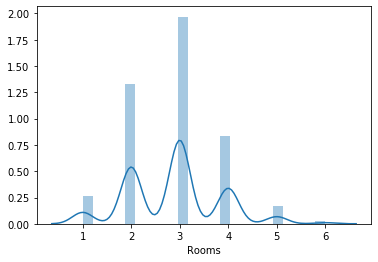

In [132]:
sns.distplot(main_df['Rooms'])

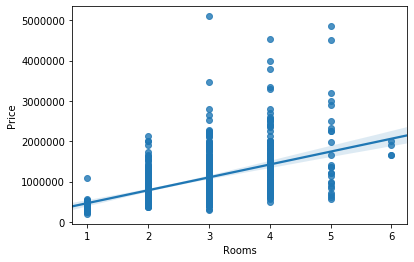

In [133]:
sns.regplot(main_df['Rooms'], main_df['Price'])

The frequency distribution looks close to normal. It also looks like there is a linear relationship from the scatterplot. The average and median price seem to be increasing as the number of rooms increases. But, the assumption of homogeniety of variances seem to be violated as the variance in prices are increasing as the number of rooms increases (except for 6 bedrooms). Not attempting to fix that now. 
### 4.1.2 Crime C Average
Next, let us look at crime C average.

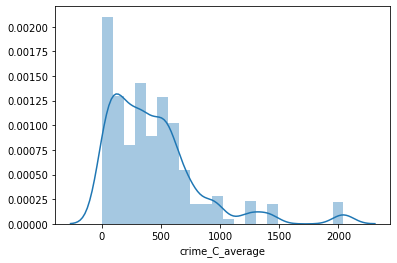

In [134]:
sns.distplot(main_df['crime_C_average'])

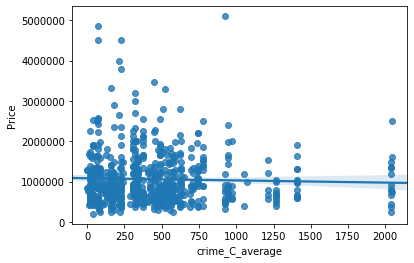

In [135]:
sns.regplot(main_df['crime_C_average'], main_df['Price'])

The distribution seems to be wildly not normal here. There also appears to be very weak, if any, linear relationship. Let us take attempt a log transformation as well as a square root transformation as we would need to compress the crime observations. 

In [136]:
main_df['log_crime_C'] = np.log(main_df['crime_C_average'])

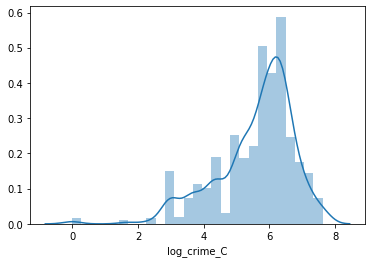

In [137]:
sns.distplot(main_df['log_crime_C'])

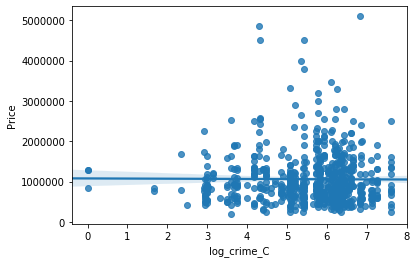

In [138]:
sns.regplot(main_df['log_crime_C'], main_df['Price'])

In [139]:
main_df['sqrt_crime_C'] = np.sqrt(main_df['crime_C_average'])

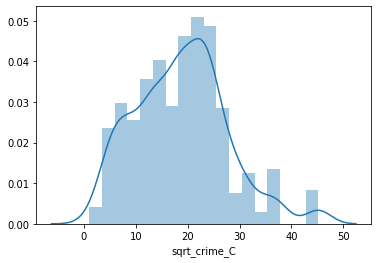

In [140]:
sns.distplot(main_df['sqrt_crime_C'])

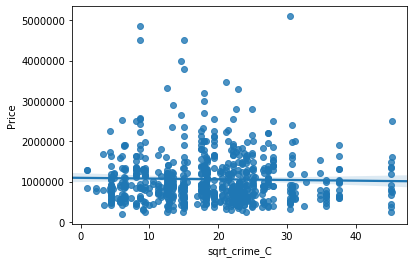

In [141]:
sns.regplot(main_df['sqrt_crime_C'], main_df['Price'])

We'll go with log transformation as there the distribution seems to be closer to normal. The distribution might be a little skewed, but, in the case of square root transformation, it looked close to bimodal. Neither trasnformation  shows much in the way of a linear relationship. It could just be that there is no strong relationship - there is no evidence of a quadratic or any other sort of relationship from the original scatterplot either. 
### 4.1.3 Travel Time to CBD
Now, moving onto the third variable, travel time to Melbourne.

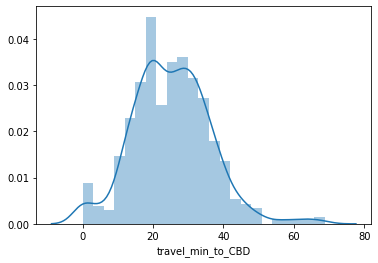

In [142]:
sns.distplot(main_df['travel_min_to_CBD'])

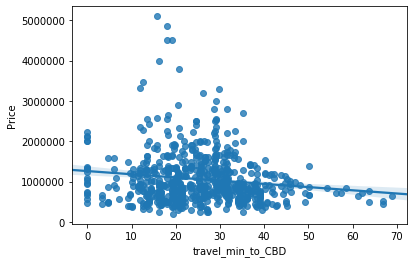

In [143]:
sns.regplot(main_df['travel_min_to_CBD'], main_df['Price'])

There seems to be a bit of a quadratic trend here with prices higher as distance from CBD increases and again decreasing as the distance increases further. The distribution also seems close to normal, though a bit bimodal (the two modes are pretty close to one another). <br>
Attempting a square transformation due to the apparent quadratic trend.

In [144]:
main_df['square_travel'] = np.square(main_df['travel_min_to_CBD'])

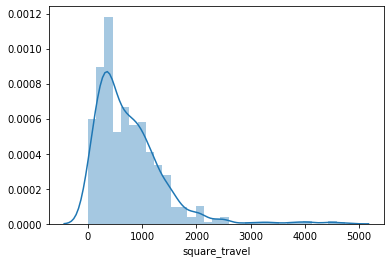

In [145]:
sns.distplot(main_df['square_travel'])

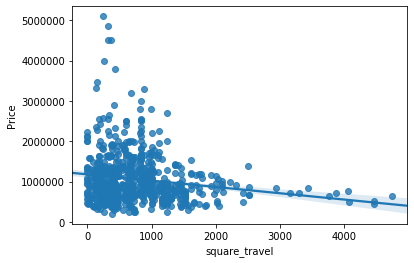

In [146]:
sns.regplot(main_df['square_travel'], main_df['Price'])

There is a clearer downward trend here - it might be prudent to use both the travel time and square of travel time to make a quadratic regession with respect to travel time later. A negative co-efficient can be expected. The distribution of the squared travel times is also close to normal - maybe a bit skewed. Since both the distribution of travel time and square of travel time is close to normal, it would make sense to use both terms in the regression. 

### 4.1.4 Age of Property
Let us now look at the age of the property.

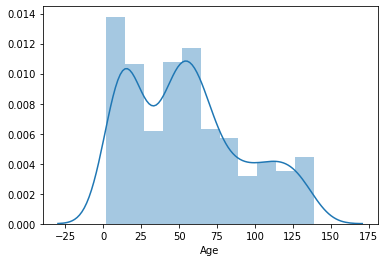

In [147]:
sns.distplot(main_df['Age'])

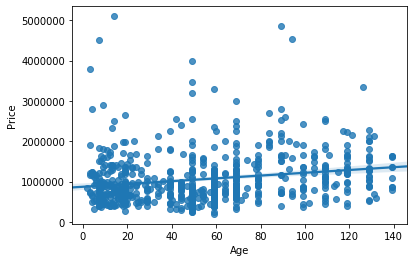

In [148]:
sns.regplot(main_df['Age'], main_df['Price'])

The distribution does not look very normal. There are two modes and they are not too close to each other either. There does seem to be a slight upward trend. Let us try to do something about the normality. Attempting log transformation and square root transformation with the idea that compressing the datapoints might help.

In [149]:
main_df['log_age'] = np.log(main_df['Age'])

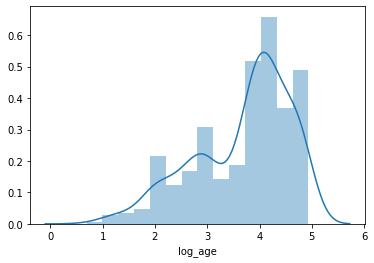

In [150]:
sns.distplot(main_df['log_age'])

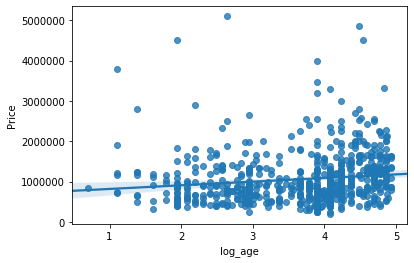

In [151]:
sns.regplot(main_df['log_age'], main_df['Price'])

In [152]:
main_df['sqrt_age'] = np.sqrt(main_df['Age'])

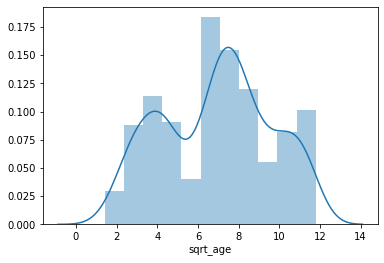

In [153]:
sns.distplot(main_df['sqrt_age'])

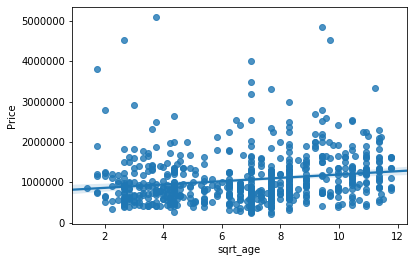

In [154]:
sns.regplot(main_df['sqrt_age'], main_df['Price'])

Both the transformations dampen slightly the upward trend. Neither distributions look very close to normal - the log transformation has a long left tail and is thus skewed while the square root transformation has three modes. Deciding to go with no transformation in the case of the age.
### 4.1.5 New Regression Model
Log transformation has been applied to crime C average while the travel time has been squared. No transformation has been done to the number of rooms and age of property. <br>
Let us now try to make a new regression model with the transformed variables.

In [155]:
main_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,distance_to_closest_primary,primary_school_ranking,closest_secondary_school,distance_to_closest_secondary,secondary_school_ranking,log_crime_C,sqrt_crime_C,square_travel,log_age,sqrt_age
0,ID291554862,33 Barnett St,KENSINGTON,1260000.0,h,19/11/2016,3,2.0,2.0,250.0,...,427.478085,116,Kensington Community High School,753.424540,558,4.304065,8.602325,289.000000,4.779123,10.908712
1,ID783722176,31 Hooker Rd,WERRIBEE,412700.0,h,19/08/2017,3,1.0,1.0,299.0,...,316.006407,not ranked,Wyndham Central Secondary College,1356.126779,not ranked,2.944439,4.358899,1235.020408,2.639057,3.741657
2,ID250710045,49 Phoenix Dr,WHEELERS HILL,1223000.0,h,27/05/2017,5,3.0,2.0,762.0,...,307.554946,not ranked,Wheelers Hill Secondary College,298.730528,426,6.018593,20.273135,1369.000000,1.945910,2.645751
3,ID854302267,5 Glendale St,SURREY HILLS,1975000.0,h,13/08/2016,5,2.0,2.0,641.0,...,840.377669,89,Siena College Ltd,1552.838284,50,6.374457,24.221203,650.250000,2.890372,4.242641
4,ID849127523,7/7 Chandler Hwy,ALPHINGTON,650000.0,t,24/09/2016,2,1.0,0.0,0.0,...,632.544077,81,Alphington Grammar School,1096.894137,86,5.808142,18.248288,576.000000,4.077537,7.681146


In [156]:
transformed_reg_model = LinearRegression()         # initialise linear model

# fit and train model
transformed_reg_model.fit(main_df[[x for x in main_df.columns if (x == 'Rooms' or 
                                                                  x == 'log_crime_C' or 
                                                                  x == 'travel_min_to_CBD' or 
                                                                  x == 'square_travel' or
                                                                  x == 'Age')]], 
                          main_df['Price'])

# get R-squared for the linear model with transformed variables
transformed_reg_model.score(main_df[[x for x in main_df.columns if (x == 'Rooms' or 
                                                                    x == 'log_crime_C' or 
                                                                    x == 'travel_min_to_CBD' or
                                                                    x == 'square_travel' or
                                                                    x == 'Age')]], 
                            main_df['Price'])

0.35084258613399266

The new regression model after the transformation gives a R-squared value of 35.08%. There is not much improvement introduced by transformation of the input variables. <br>
Actually, it might be better to use other variables here for predicting property prices as we know that logically the suburb and house size also plays very important role in the pricing of properties. Maybe the reason that even after transformation the R-squared has not improved much is that the choice of variables were poor in the first place. 
## 4.2 Standardization
After this, the values of the variables can be standardized or normalised. <br>
Now, this isn't really expected to increase the R-squared value and the explanatory power of the model. It will just make the variables on the same scale and easy to compare between their relative effect on the price.

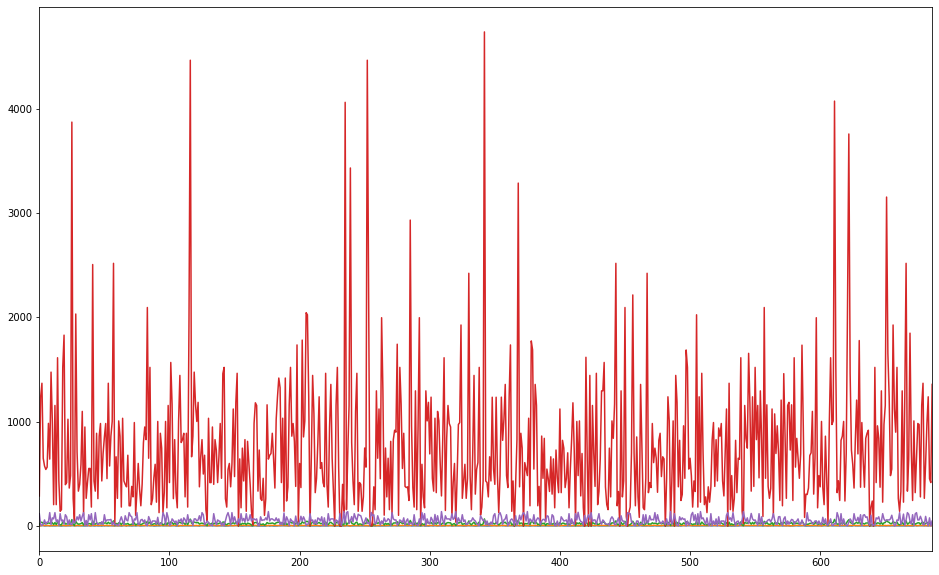

In [157]:
plt.figure(figsize = (16, 10))

main_df["Rooms"].plot(), main_df["log_crime_C"].plot(), 
main_df["travel_min_to_CBD"].plot(), main_df["square_travel"].plot(), 
main_df["Age"].plot()

Clearly, it can be seen that the different variables are on different scales. Square of travel times is completely dominating the plot and the other are barely visible. The maxima of rooms is only 6. <br><br>
There are few large values in travel time from the regional trains which after squaring is now very large. Because of these outliers, min-max normalisation would not be ideal as the max would be very high and squeeze most of the datapoints into a very small range. <br>
Since, we cannot use different normalisation methods for different variables, it would be best to use standardization using z-scores. 

In [158]:
std_scale = preprocessing.StandardScaler().fit(main_df[['Rooms', 'log_crime_C', 'travel_min_to_CBD', 
                                                        'square_travel', 'Age']])
main_df_std = std_scale.transform(main_df[['Rooms', 'log_crime_C', 'travel_min_to_CBD', 
                                           'square_travel', 'Age']]) 
main_df_std[0:5]

array([[ 0.14238757, -1.08157159, -0.75158614, -0.7372044 ,  1.7307497 ],
       [ 0.14238757, -2.23142847,  0.88772104,  0.73259579, -1.10534284],
       [ 2.26891493,  0.36843141,  1.05552414,  0.94075538, -1.29441567],
       [ 2.26891493,  0.66939076,  0.01643573, -0.17594239, -0.99730121],
       [-0.92087612,  0.19044997, -0.11909754, -0.29130212,  0.11012539]])

In [159]:
main_df['room_scaled'] = main_df_std[:,0] 
main_df['log_crime_C_scaled'] = main_df_std[:,1] 
main_df['travel_scaled'] = main_df_std[:,2] 
main_df['square_travel_scaled'] = main_df_std[:,3] 
main_df['age_scaled'] = main_df_std[:,4] 

main_df.head()

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,LandSize,...,log_crime_C,sqrt_crime_C,square_travel,log_age,sqrt_age,room_scaled,log_crime_C_scaled,travel_scaled,square_travel_scaled,age_scaled
0,ID291554862,33 Barnett St,KENSINGTON,1260000.0,h,19/11/2016,3,2.0,2.0,250.0,...,4.304065,8.602325,289.000000,4.779123,10.908712,0.142388,-1.081572,-0.751586,-0.737204,1.730750
1,ID783722176,31 Hooker Rd,WERRIBEE,412700.0,h,19/08/2017,3,1.0,1.0,299.0,...,2.944439,4.358899,1235.020408,2.639057,3.741657,0.142388,-2.231428,0.887721,0.732596,-1.105343
2,ID250710045,49 Phoenix Dr,WHEELERS HILL,1223000.0,h,27/05/2017,5,3.0,2.0,762.0,...,6.018593,20.273135,1369.000000,1.945910,2.645751,2.268915,0.368431,1.055524,0.940755,-1.294416
3,ID854302267,5 Glendale St,SURREY HILLS,1975000.0,h,13/08/2016,5,2.0,2.0,641.0,...,6.374457,24.221203,650.250000,2.890372,4.242641,2.268915,0.669391,0.016436,-0.175942,-0.997301
4,ID849127523,7/7 Chandler Hwy,ALPHINGTON,650000.0,t,24/09/2016,2,1.0,0.0,0.0,...,5.808142,18.248288,576.000000,4.077537,7.681146,-0.920876,0.190450,-0.119098,-0.291302,0.110125


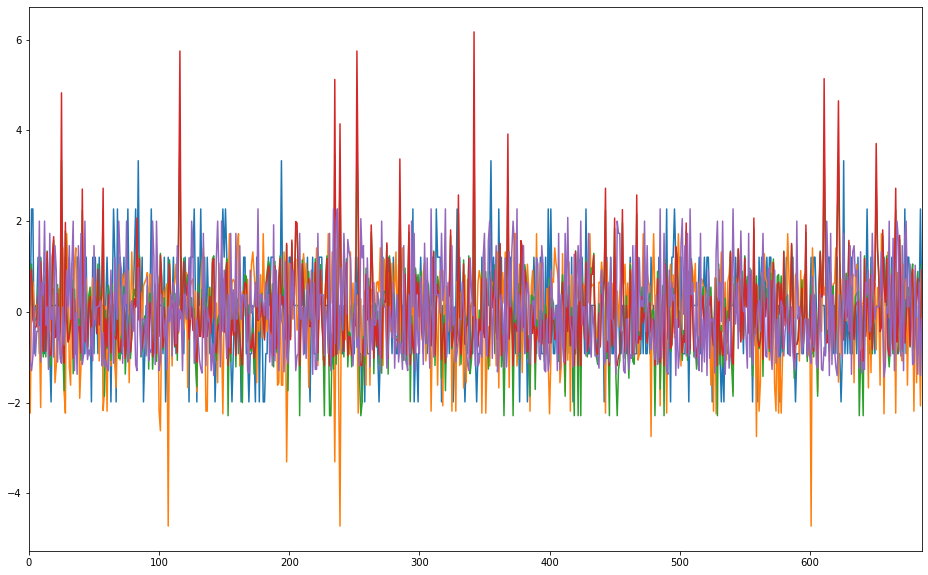

In [160]:
plt.figure(figsize = (16, 10))

main_df["room_scaled"].plot(), main_df["log_crime_C_scaled"].plot(), 
main_df["travel_scaled"].plot(), main_df["square_travel_scaled"].plot(), 
main_df["age_scaled"].plot()

Great, now all variables are on the same scale. <br>
Let us make another regression model using these scaled variables.

In [161]:
scaled_reg_model = LinearRegression()         # initialise linear model

# fit and train model
scaled_reg_model.fit(main_df[[x for x in main_df.columns if (x == 'room_scaled' or 
                                                             x == 'log_crime_C_scaled' or 
                                                             x == 'travel_scaled' or 
                                                             x == 'square_travel_scaled' or 
                                                             x == 'age_scaled')]], 
                          main_df['Price'])

# get R-squared for the linear model with transformed variables
scaled_reg_model.score(main_df[[x for x in main_df.columns if (x == 'room_scaled' or 
                                                               x == 'log_crime_C_scaled' or 
                                                               x == 'travel_scaled' or 
                                                               x == 'square_travel_scaled' or 
                                                               x == 'age_scaled')]], 
                            main_df['Price'])

0.35084258613399266

In [162]:
print(scaled_reg_model.coef_, scaled_reg_model.intercept_)

[358391.54038251  19647.07927901 -81393.94404247 -89377.28730125
 109146.94306954] 1062530.1426491993


The R-squared value remains the same (as expected), but the co-efficients (including intercepts) have changed. Comparing, we can see that the number of rooms make the most impact (co-efficient is AUD 358k for one standard deviation change) on the price of property while crime C average makes the lowest amount of impact (co-efficient is AUD 19k for one standard deviation change). 
# 5. Conclusion
In conclusion, we integrated data from multiple different sources. The sources included csv files, xml files, xls files, web scarping (html), shapefiles and gtfs data in the form of txt files. The data was brought together using various methods including merging, concatenating and other methods to bring together information about the properties. Various different packages were used for achieving this. <br>
Further, data reshaping was done to transform the data keeping in mind the requirement of making a linear regression model using certain variables. Standardization of the data was also done using z-scores.
# 6. References
- Gordon A. (2018). *Working with Open Data shape files using Geopandas — how to match up your data with the areas defined in the shape file*. Retrieved from https://medium.com/dataexplorations/working-with-open-data-shape-files-using-geopandas-how-to-match-up-your-data-with-the-areas-9377471e49f2<br>

- Hayden A. (2012). *is it possible to do fuzzy match merge with python pandas?* [Response to]. Retrieved from https://stackoverflow.com/questions/13636848/is-it-possible-to-do-fuzzy-match-merge-with-python-pandas]<br>

- Michael0x2a (2013). *Getting distance between two points based on latitude/longitude* [Response to]. Retrieved from https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude<br>

- Muhamed G. (2011). *Pandas group-by and sum* [Response to]. Retrieved from https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum<br>

- pandas 0.25.2 documentation (n.d.). *pandas.read_excel*. Retrieved from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html<br>

- Python Software Foundation (n.d.). *The ElementTree XML API*. Retrieved from https://docs.python.org/2/library/xml.etree.elementtree.html<br>

- Stokvis W. (2018). *How to convert hhmmss.ff format into datetime with pandas* [Response to]. Retrieved from https://stackoverflow.com/questions/51486751/how-to-convert-hhmmss-ff-format-into-datetime-with-pandas/51486790<br>
